## Heiner Romero Leiva - Project 

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas.util.testing as tm

/Users/heinerleivagmail.com/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
print(os.getcwd())
os.chdir("/Users/heinerleivagmail.com")

/Users/heinerleivagmail.com


### Data Loading

In [3]:
# Dataset load
data = pd.read_csv('scoringmodel2.csv', delimiter=',')

In [4]:
# First exploration
data.head()

,Office,CustomerID,City,State,EmailDomain,CarMake,CarModel,CarYear,CarValue,AgeOfCustomer,...,AnnualSalary,flag_Spouse,LoanType,LoanAmount,LoanInterest,Maturity,Lien,flag_Cosigner,BadReference,Default
0,Salem,782,Danvers,MA,verizon.net,Nissan,Pathfinder,2011,8000,57,...,NaN,1,6,1000.0,25,31,0,1,0,1
1,Salem,783,Danvers,MA,verizon.net,Nissan,Pathfinder,2011,8000,57,...,NaN,1,6,1000.0,25,31,0,1,0,1
2,Manchester,572,Chester,NH,gmail.com,Chevrolet,Avalanche,2007,2075,35,...,14400,1,8,1000.0,25,31,0,0,0,1
3,Nashua,1108,Lowell,MA,NaN,Honda,Civic,2001,300,29,...,14932.08,1,11,200.0,25,30,0,0,0,0
4,Nashua,1109,Hyannis,MA,22yahoo.com,Honda,Odyssey,2011,11600,40,...,75226.8,1,2,1500.0,25,30,0,0,0,0


In [5]:
# Columns
print(data.columns)

Index(['Office', 'CustomerID', 'City', 'State', 'EmailDomain', 'CarMake',
       'CarModel', 'CarYear', 'CarValue', 'AgeOfCustomer', 'Addvert',
       'flag_ACH', 'ccAuth', 'AddressStatus', 'PhoneStatus', 'flag_Employment',
       'flag_CompanyPhone', 'PaidFrequency', 'AnnualSalary', 'flag_Spouse',
       'LoanType', 'LoanAmount', 'LoanInterest', 'Maturity', 'Lien',
       'flag_Cosigner', 'BadReference', 'Default'],
      dtype='object')


#### Features description

* Office: The office branch where customers applied for the loan **categorical**
* CustomerID: Customer ID **categorical**
* City: City of customer residency **categorical**
* State: State of customer residency **categorical**
* EmailDomain: Customer email domain **categorical**
* CarMake: Customer car make **categorical**
* CarModel: Customer car model **categorical**
* CarYear: Customer car year **categorical**
* CarValue: Customer car value **numerical**
* AgeOfCustomer: Customer age **numerical**
* Addvert: Addvertizement type **categorical**
* flag_ACH: Indicate whether the customer has provided ACH account **categorical**
* ccAuth: Indicate whether the customer has provided credit card authorization **categorical**
* AddressStatus: The status of the address customer has provided (active or not) **categorical**
* PhoneStatus: The status of the phone customer has provided (active or not) **categorical**
* flag_Employment: Indicate whether the customer has employment **categorical**
* flag_CompanyPhone: Indicate whether the customer has company phone **categorical**
* PaidFrequency: Customer monthly salary payroll frequency **numerical**
* AnnualSalary: Customer annual salary **numerical**
* flag_Spouse: Indicate whether the customer has spouse **categorical**
* LoanType: The type of loan **categorical**
* LoanAmount: The amount of loan approved **numerical**
* LoanInterest: The interest of loan approved **numerical**
* Maturity: The cycle of loan (number of days for payment) **numerical**
* Lien: Indicate whether we put a lien on the vehicle **categorical**
* flag_Cosigner: Indicate whether the customer has a co-signer **categorical**
* BadReference: Indicate whether we are unable to reach the customer's reference **categorical**
* Default: Indicate whether the customer has defaulted on the loan payment **categorical**

### Exploratory Data Analysis

In [6]:
# Relevant information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Office             5976 non-null   object 
 1   CustomerID         5976 non-null   int64  
 2   City               5946 non-null   object 
 3   State              5959 non-null   object 
 4   EmailDomain        4376 non-null   object 
 5   CarMake            5976 non-null   object 
 6   CarModel           5974 non-null   object 
 7   CarYear            5976 non-null   int64  
 8   CarValue           5968 non-null   object 
 9   AgeOfCustomer      5976 non-null   int64  
 10  Addvert            5976 non-null   object 
 11  flag_ACH           5976 non-null   int64  
 12  ccAuth             5976 non-null   int64  
 13  AddressStatus      5976 non-null   int64  
 14  PhoneStatus        5976 non-null   int64  
 15  flag_Employment    5976 non-null   int64  
 16  flag_CompanyPhone  5976 

In [7]:
# Removing white spaces
data['Office'].str.strip()
data['City'].str.strip()
data['State'].str.strip()
data['EmailDomain'].str.strip()
data['CarMake'].str.strip()
data['CarModel'].str.strip()
data['Addvert'].str.strip()

0        Website
1        Website
2        Website
3        Website
4          Other
          ...   
5971    Drive By
5972     Website
5973    Drive By
5974       Other
5975       Other
Name: Addvert, Length: 5976, dtype: object

#### There are 21 features of categorical values and 7 features of numerical data. 

In [8]:
# Finding NAN values
data.isnull().sum()

Office                  0
CustomerID              0
City                   30
State                  17
EmailDomain          1600
CarMake                 0
CarModel                2
CarYear                 0
CarValue                8
AgeOfCustomer           0
Addvert                 0
flag_ACH                0
ccAuth                  0
AddressStatus           0
PhoneStatus             0
flag_Employment         0
flag_CompanyPhone       0
PaidFrequency           1
AnnualSalary          106
flag_Spouse             0
LoanType                0
LoanAmount              0
LoanInterest            0
Maturity                0
Lien                    0
flag_Cosigner           0
BadReference            0
Default                 0
dtype: int64

In [9]:
City = (30/5976*100)
State = (17/5976*100)
email = (1600/5976*100)
carmodel = (2/5976 *100)
Salary = (106/5916*100)
CarValue = (8/5976*100)
PaidFre = (1/5976 * 100)

In [10]:
print("The percentage of the missing values for the City is: " + str(City) + "%")
print("The percentage of the missing values for the State is: " + str(State) + "%")
print("The percentage of the missing values for the Email Domain is: " + str(email) + "%")
print("The percentage of the missing values for the Car Model is: " + str(carmodel) + "%")
print("The percentage of the missing values for the Annual Salary is: " + str(Salary) + "%")
print("The percentage of the missing values for the Car Value is: " + str(CarValue) + "%")
print("The percentage of the missing values for the Paid Frequency is: " + str(PaidFre) + "%")

The percentage of the missing values for the City is: 0.5020080321285141%
The percentage of the missing values for the State is: 0.28447121820615795%
The percentage of the missing values for the Email Domain is: 26.77376171352075%
The percentage of the missing values for the Car Model is: 0.03346720214190094%
The percentage of the missing values for the Annual Salary is: 1.7917511832319135%
The percentage of the missing values for the Car Value is: 0.13386880856760375%
The percentage of the missing values for the Paid Frequency is: 0.01673360107095047%


In [11]:
# Obtaining the mode of the Email Domain feature
data['EmailDomain'].mode()

0    gmail.com
dtype: object

In [12]:
# Frequency table of EmailDomain
pd.value_counts(data['EmailDomain'])

gmail.com                  1884
yahoo.com                  1352
hotmail.com                 237
aol.com                     183
comcast.net                 101
                           ... 
dbcjax.com                    1
lmccares.org                  1
thompsonauto.net              1
gmail,com                     1
sephyssunshinetours.com       1
Name: EmailDomain, Length: 194, dtype: int64

In [13]:
# Relative Frequency Table of EmailDomain
100 * data['EmailDomain'].value_counts() / len(data['EmailDomain'])

gmail.com                  31.526104
yahoo.com                  22.623829
hotmail.com                 3.965863
aol.com                     3.062249
comcast.net                 1.690094
                             ...    
dbcjax.com                  0.016734
lmccares.org                0.016734
thompsonauto.net            0.016734
gmail,com                   0.016734
sephyssunshinetours.com     0.016734
Name: EmailDomain, Length: 194, dtype: float64

#### Analysis of EmailDomain
* For cases when there is a lot of missing data there are some methods to use, for example: an imputation method using the PyOD library that uses KNN algorithm to predict the categories of the missing values, but the first problem is that there are several categories (194 different types of emails domains) if an imputation is done using a KNN or even a SVM is not the best option due to the amount of missing values.  
* other option is to use the mode, but it will be 1600 rows of gmail.com and it would jump from 31.52% to 58.29% (almost the double) the difference is too much to consider this option, if missing data would have been less than the 5% of the total observations fot this feature it would have been a good option. 
* Given the above the most reasonable way is treating this missing values as a new factor called "Missing email" for the categorical variable. 

In [14]:
data['EmailDomain'].fillna("Missing_email", inplace = True)

In [15]:
data['EmailDomain'].isnull().sum()

0

#### Analysis of AnnualSalary

In [16]:
# Converting the data type from objetc to float
data['AnnualSalary'].apply(type).value_counts()

<class 'str'>      5870
<class 'float'>     106
Name: AnnualSalary, dtype: int64

In [17]:
data['AnnualSalary'] = data['AnnualSalary'].str.replace(',', '')

In [18]:
data['AnnualSalary'] = data['AnnualSalary'].str.replace(' ', '')

In [19]:
data['AnnualSalary'] = data['AnnualSalary'].str.replace('*', '.')

In [20]:
data['AnnualSalary'] = data['AnnualSalary'].str.replace('SSI', 'NaN')

In [21]:
data['AnnualSalary'] = data['AnnualSalary'].str.replace('CL1-No', 'NaN')

In [22]:
data.iloc[2855,18] = 60000.00
data.iloc[3076,18] = 13200.00
data.iloc[4150,18] = 15360.00
data.iloc[5145,18] = 22219.20

In [23]:
data['AnnualSalary']=data['AnnualSalary'].astype('float')

In [24]:
data['AnnualSalary'].apply(type).value_counts()

<class 'float'>    5976
Name: AnnualSalary, dtype: int64

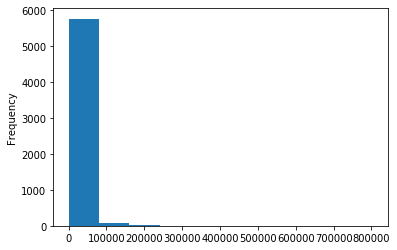

In [25]:
# Defyning the type of imputation
data['AnnualSalary'].plot.hist();
# Histogram is skewed left so the imputation will be with the median

In [26]:
# Missing observations of salaries represents 1.79% of the total amount, so the method used for this will be impute with median due to there is no a normal distribution in this feature.
data['AnnualSalary'].median()

19999.0

In [27]:
data['AnnualSalary'].fillna(19999.0, inplace = True)

In [28]:
data['AnnualSalary'].isnull().sum()

0

#### Analysis of Car Value

In [29]:
# Converting the data type from objetc to float
data['CarValue'].apply(type).value_counts()

<class 'str'>      5968
<class 'float'>       8
Name: CarValue, dtype: int64

In [30]:
data['CarValue'] = data['CarValue'].str.replace('$', '')

In [31]:
data['CarValue'] = data['CarValue'].str.replace(',', '')

In [32]:
data['CarValue'] = data['CarValue'].str.replace('GPDZ62', 'NaN')

In [33]:
data['CarValue'] = data['CarValue'].str.replace('GPDZ62', 'NaN')

In [34]:
data.iloc[4528,8] = 1350.00
data.iloc[4529,8] = 1350.00

In [35]:
data['CarValue']=data['CarValue'].astype('float')

In [36]:
data['CarValue'].apply(type).value_counts()

<class 'float'>    5976
Name: CarValue, dtype: int64

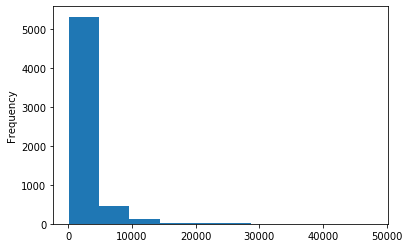

In [37]:
# Defyning the type of imputation
data['CarValue'].plot.hist();
# Histogram is skewed left so the imputation will be with the median

In [38]:
# Missing observations of car value are  0.13% of the total amount, so the method used for this will be impute with median due to there is no a normal distribution in this feature.
data['CarValue'].median()

1375.0

In [39]:
data['CarValue'].fillna(1375.00, inplace = True)

In [40]:
data['CarValue'].isnull().sum()

0

#### Analysis of PaidFrequency

In [41]:
data['PaidFrequency'].apply(type).value_counts()

<class 'float'>    5976
Name: PaidFrequency, dtype: int64

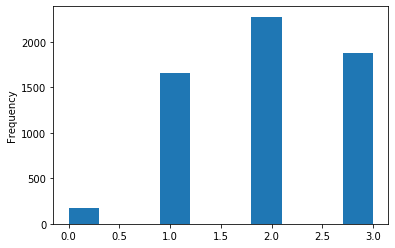

In [42]:
# Defyning the type of imputation
data['PaidFrequency'].plot.hist();
# Histogram is skewed right so the imputation will be with the median

In [43]:
# Missing observations of PaidFrequency represent 0.16% of the total amount, so the method used for this will be impute with median due to there is no a normal distribution in this feature.
data['PaidFrequency'].median()

2.0

In [44]:
data['PaidFrequency'].fillna(2.0, inplace = True)

In [45]:
data['CarValue'].isnull().sum()

0

#### Analysis of Car Model

In [46]:
# Missing observations of CarModel represent 0.03% of the total amount and they will be deleted, because if missing values are imputed with the mode, there is a possibility of Car Make is not the same with the CarModel, so it will be a bias. 
# Deleting it better and it only apply for 2 observations. 
data=data.dropna(subset=['CarModel'])

In [47]:
data['CarModel'].isnull().sum()

0

In [48]:
# Checking if all NaNs Values have been handled
data.isnull().sum()

Office                0
CustomerID            0
City                 30
State                17
EmailDomain           0
CarMake               0
CarModel              0
CarYear               0
CarValue              0
AgeOfCustomer         0
Addvert               0
flag_ACH              0
ccAuth                0
AddressStatus         0
PhoneStatus           0
flag_Employment       0
flag_CompanyPhone     0
PaidFrequency         0
AnnualSalary          0
flag_Spouse           0
LoanType              0
LoanAmount            0
LoanInterest          0
Maturity              0
Lien                  0
flag_Cosigner         0
BadReference          0
Default               0
dtype: int64

### Analysis of City

In [49]:
# Going further in the state and city columns there are 17 and 30 observations null respectively. For some of the null values in the city there are associated FL in the state, due to FL can have a different cities the more convinient way here is to 
# delete the null values and ONLY because they are 30 of a total of 5974 if the NaN values are handled in City they also be handled in State aas well. 

In [50]:
data=data.dropna(subset=['City'])

In [51]:
# Finding NAN values
data.isnull().sum()

Office               0
CustomerID           0
City                 0
State                0
EmailDomain          0
CarMake              0
CarModel             0
CarYear              0
CarValue             0
AgeOfCustomer        0
Addvert              0
flag_ACH             0
ccAuth               0
AddressStatus        0
PhoneStatus          0
flag_Employment      0
flag_CompanyPhone    0
PaidFrequency        0
AnnualSalary         0
flag_Spouse          0
LoanType             0
LoanAmount           0
LoanInterest         0
Maturity             0
Lien                 0
flag_Cosigner        0
BadReference         0
Default              0
dtype: int64

In [52]:
data.info()
# 2 Columns will be converted in different data types: CustomerID to object and Maturity ot int. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5944 entries, 0 to 5975
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Office             5944 non-null   object 
 1   CustomerID         5944 non-null   int64  
 2   City               5944 non-null   object 
 3   State              5944 non-null   object 
 4   EmailDomain        5944 non-null   object 
 5   CarMake            5944 non-null   object 
 6   CarModel           5944 non-null   object 
 7   CarYear            5944 non-null   int64  
 8   CarValue           5944 non-null   float64
 9   AgeOfCustomer      5944 non-null   int64  
 10  Addvert            5944 non-null   object 
 11  flag_ACH           5944 non-null   int64  
 12  ccAuth             5944 non-null   int64  
 13  AddressStatus      5944 non-null   int64  
 14  PhoneStatus        5944 non-null   int64  
 15  flag_Employment    5944 non-null   int64  
 16  flag_CompanyPhone  5944 

In [53]:
data['CustomerID']= data['CustomerID'].astype('object')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5944 entries, 0 to 5975
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Office             5944 non-null   object 
 1   CustomerID         5944 non-null   object 
 2   City               5944 non-null   object 
 3   State              5944 non-null   object 
 4   EmailDomain        5944 non-null   object 
 5   CarMake            5944 non-null   object 
 6   CarModel           5944 non-null   object 
 7   CarYear            5944 non-null   int64  
 8   CarValue           5944 non-null   float64
 9   AgeOfCustomer      5944 non-null   int64  
 10  Addvert            5944 non-null   object 
 11  flag_ACH           5944 non-null   int64  
 12  ccAuth             5944 non-null   int64  
 13  AddressStatus      5944 non-null   int64  
 14  PhoneStatus        5944 non-null   int64  
 15  flag_Employment    5944 non-null   int64  
 16  flag_CompanyPhone  5944 

#### Analysis of Maturity

In [55]:
data['Maturity'] = [30 if x=='$30.00' or x=='$30.00 ' or x=='30.00' or x=='30.00 'else x for x in data['Maturity']]
data['Maturity']= data['Maturity'].astype(np.int64)

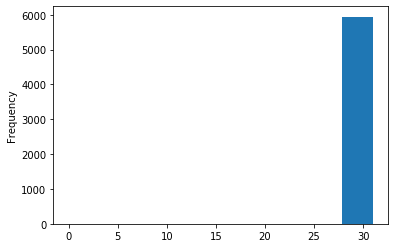

In [56]:
# Defyning the type of imputation
data['Maturity'].plot.hist();
# Histogram is skewed right so the imputation will be with the median

In [57]:
data['Maturity'].median()

30.0

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5944 entries, 0 to 5975
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Office             5944 non-null   object 
 1   CustomerID         5944 non-null   object 
 2   City               5944 non-null   object 
 3   State              5944 non-null   object 
 4   EmailDomain        5944 non-null   object 
 5   CarMake            5944 non-null   object 
 6   CarModel           5944 non-null   object 
 7   CarYear            5944 non-null   int64  
 8   CarValue           5944 non-null   float64
 9   AgeOfCustomer      5944 non-null   int64  
 10  Addvert            5944 non-null   object 
 11  flag_ACH           5944 non-null   int64  
 12  ccAuth             5944 non-null   int64  
 13  AddressStatus      5944 non-null   int64  
 14  PhoneStatus        5944 non-null   int64  
 15  flag_Employment    5944 non-null   int64  
 16  flag_CompanyPhone  5944 

### Exploratory Data Analysis

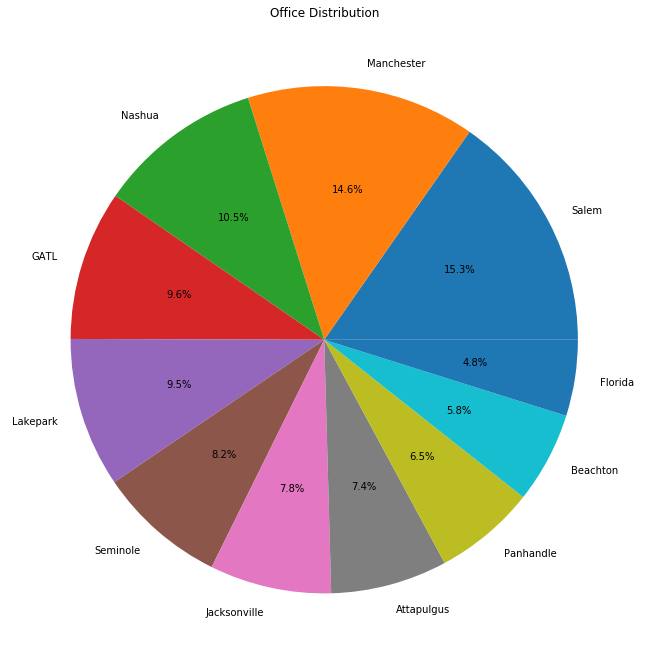

In [59]:
# Pie charts
f, ax = plt.subplots(figsize=(25, 27))

# Office
plt.subplot(2, 2, 1)
plt.title("Office Distribution")
sums = data["Office"].value_counts()
labels = data["Office"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')
plt.show()

# It not recommended to plot the customerID pie chart or even a histogram because for every customer there is an ID associated so there are a lot of observations and for analysis is not relevant. 

In [60]:
# Frequency table of City
pd.value_counts(data['City'])

Jacksonville    645
Pensacola       511
Tallahassee     460
Manchester      248
Lake City       210
               ... 
Campbelton        1
S Weymouth        1
Brocton           1
Fullerton         1
Destin            1
Name: City, Length: 634, dtype: int64

In [61]:
data['City'].unique()

array(['Danvers', 'Chester', 'Lowell', 'Hyannis', 'Somerville', 'Nashua',
       'Tewksbury', 'Laconia', 'Worcester', 'Mattapan', 'Moultonborough',
       'Brocton', 'Taunton', 'Beverly', 'Derry', 'Salem', 'Medway',
       'Shirley', 'Lawrence', 'Braintree', 'Litchfield', 'Maynard',
       'Medfield', 'Plymouth', 'North Andover', 'Boylston', 'Keene',
       'Lexington', 'Fitchburg', 'Arlington', 'Westfield', 'Windham',
       'Manchester', 'Dracut', 'Watertown', 'Holland', 'Whitinsvilee',
       'Franingham', 'Lynn', 'Stoughton', 'E. Boston', 'Milford',
       'Boston', 'Peabody', 'Billerica', 'Dorchester', 'Allenstown',
       'Roxbury', 'Northwood', 'Londonderry', 'Auburn', 'Roslindale',
       'Hampton', 'Charlton', 'Ashland', 'Brockton', 'Woburn',
       'Whitinsville', 'Wilmington', 'Deerfield', 'N Chelmsford',
       'Worchester', 'Randolph', 'Weymouth', 'Fall River', 'Groton',
       'Winchendon', 'N Easton', 'Sandwich', 'Webster', 'Everett',
       'Barre', 'Quincy', 'Hubbardst

In [62]:
# Frequency table of State
data['State'] = ['MA' if x == 'ma' else x for x in data['State']]
pd.value_counts(data['State'])

FL    3720
MA    1294
NH     666
GA     177
AL      36
TX       6
TN       6
SC       5
PA       4
NY       4
VA       3
ME       3
OK       3
NC       3
ND       2
IL       2
CA       2
MO       1
HI       1
IN       1
MD       1
VT       1
RI       1
KY       1
LA       1
Name: State, dtype: int64

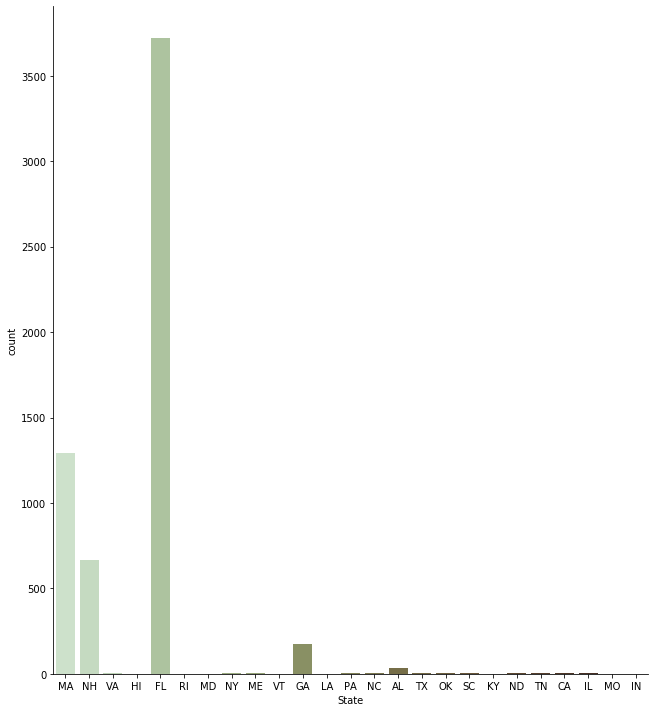

In [63]:
sns.catplot(x="State", kind="count", palette="ch:.87", height=10, aspect=.9, data=data);

In [64]:
data['State'].unique()

array(['MA', 'NH', 'VA', 'HI', 'FL', 'RI', 'MD', 'NY', 'ME', 'VT', 'GA',
       'LA', 'PA', 'NC', 'AL', 'TX', 'OK', 'SC', 'KY', 'ND', 'TN', 'CA',
       'IL', 'MO', 'IN'], dtype=object)

In [65]:
# Frequency table of EmailDomain
pd.value_counts(data['EmailDomain'])

gmail.com                  1880
Missing_email              1581
yahoo.com                  1345
hotmail.com                 237
aol.com                     183
                           ... 
fisglobal.com                 1
dbcjax.com                    1
lmccares.org                  1
gmail,com                     1
sephyssunshinetours.com       1
Name: EmailDomain, Length: 195, dtype: int64

In [66]:
data['EmailDomain'].unique()

array(['verizon.net', 'gmail.com', 'Missing_email', '22yahoo.com',
       'hotmail.com', 'yahoo.com', 'auc.edu', 'me.com', 'comcast.net',
       'cox.net', 'kgglass.net', 'aol.com', 'icloud.com',
       'ch.harvard.edu', 'gmaiil.com', 'msn.com', 'live.com',
       'outlook.com', 'caregivers.com', 'gmail,com', 'alumni.harvard.edu',
       'charter.net', 'gmail.cm', 'mac.com', 'myfairpoint.net',
       'boston.gov', 'eversource.com', 'GMAIL.COM', 'YAHOO.COM',
       'tlsbos.com', 'rocketmail.com', 'northshore.edu', 'mwcc.edu',
       'gnail.com', 'merrimack.edu', 'aim.com', 'gmial.com',
       'eatonvance.com', 'benchmarkquality.com', 'propertyinovation.com',
       'COMCAST.NET', 'collinsdoor.com', 'cwi', 'verizon.com',
       'contactmha.com', 'ymail.com', 'yaqhoo.com', 'youthvillages.org',
       'mckenna-ovellette.com', 'state.ma.us', 'wildcats.unh.edu',
       'juno.com', 'na', 'kingdomofroyal.com', 'wit.edu', 'tjx.com',
       'goharvard.edu', 'thompsonauto.net', 'comcast,net',
   

In [67]:
# Frequency table of Car Make - Important: this column has a lot of inconsistency data, several names associated to a specific brand, bad spelling of brands, incomplete names and so on, so the best option was to clean this column using excel.
# The final  cleaned result is showed here.
data['CarMake'] = ['Chevrolet' if x == 'Monte Carlo' else x for x in data['CarMake']]
data['CarMake'].unique()

array(['Nissan', 'Chevrolet', 'Honda', 'Toyota', 'Volvo', 'Chrysler',
       'Mitsubishi', 'Jeep', 'Ford', 'Audi', 'Dodge', 'Subaru', 'Lexus',
       'Hyundai', 'Mazda', 'Mercedes Benz', 'Lincoln', 'Cadillac', 'Bmw',
       'Gmc', 'Volkswagen', 'Scion', 'Porsche', 'Acura', 'Saturn',
       'Buick', 'Infiniti', 'Kia', 'Mercury', 'Pontiac', 'Jaguar',
       'Mini Cooper', 'Land Rover', 'Isuzu', 'Saab', 'Plymouth',
       'Oldsmobile', 'Freightliner', 'Suzuki', 'GMC', 'Triumph', 'Fiat'],
      dtype=object)

In [68]:
# Frequency table of Car Make
pd.value_counts(data['CarMake'])

Ford             1067
Chevrolet         867
Toyota            458
Dodge             421
Honda             410
Nissan            350
Jeep              207
Chrysler          187
Gmc               167
Buick             160
Pontiac           145
Hyundai           141
Cadillac          119
Mercedes Benz     108
Lincoln           108
Mercury            95
Mazda              94
Kia                92
Saturn             90
Mitsubishi         75
Acura              66
Bmw                64
Volkswagen         64
Oldsmobile         59
Lexus              44
Volvo              44
Subaru             42
Infiniti           39
Audi               30
Isuzu              26
Suzuki             24
Saab               19
Plymouth           16
Jaguar             16
Scion              12
GMC                 5
Land Rover          4
Mini Cooper         3
Porsche             3
Triumph             1
Freightliner        1
Fiat                1
Name: CarMake, dtype: int64

In [69]:
# Frequency table of Car Model
data['CarModel'].unique()

array(['Pathfinder', 'Avalanche', 'Civic', ..., 'Freestar Se', 'Outlook',
       'Suburban Lt Autoride'], dtype=object)

In [70]:
# Frequency table of Car Make
pd.value_counts(data['CarModel'])

Accord                       188
Explorer                     156
Camry                        139
F150                         130
Silverado                    121
                            ... 
1500Hd                         1
Grand Cherokee Special Ed      1
Es330                          1
Grand Se                       1
Camrey                         1
Name: CarModel, Length: 1108, dtype: int64

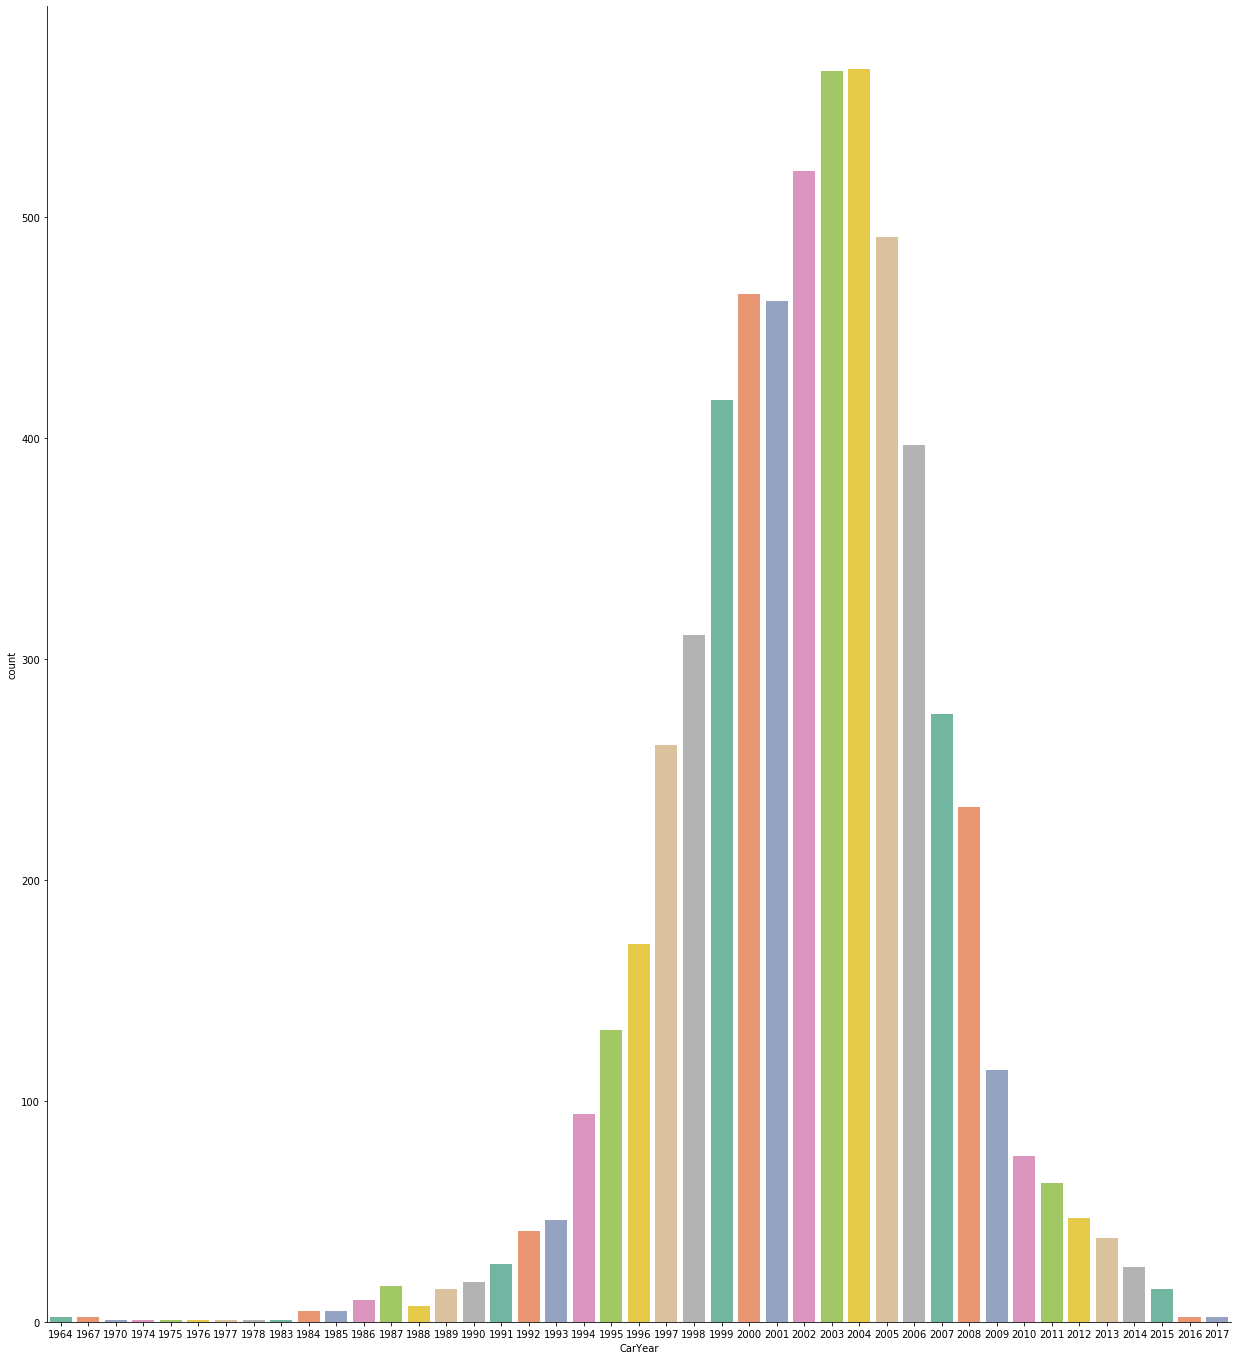

In [71]:
# Histogram of Car Year
sns.catplot(x="CarYear", kind="count", palette="Set2", height=19, aspect=.9, data=data);

In [72]:
# Frequency table of Car Year
pd.value_counts(data['CarYear'])

2004    567
2003    566
2002    521
2005    491
2000    465
2001    462
1999    417
2006    397
1998    311
2007    275
1997    261
2008    233
1996    171
1995    132
2009    114
1994     94
2010     75
2011     63
2012     47
1993     46
1992     41
2013     38
1991     26
2014     25
1990     18
1987     16
1989     15
2015     15
1986     10
1988      7
1984      5
1985      5
1964      2
2016      2
2017      2
1967      2
1977      1
1974      1
1978      1
1975      1
1983      1
1976      1
1970      1
Name: CarYear, dtype: int64

In [73]:
# Cleaning data and inconsistencies due to there are few errors will be performed here. 
data['Addvert'] = ['Word of Mouth' if x=='Word of Mou' or x=='word of mou' else x for x in data['Addvert']]
data['Addvert'] = ['Drive By' if x=='Drive by' else x for x in data['Addvert']]
data['Addvert'] = ['ValPak' if x=='Valpak' or x=='Val Pak' else x for x in data['Addvert']]
data['Addvert'] = ['Other' if x == '6036614732' else x for x in data['Addvert']]

In [74]:
# Frequency table of Age of Advertising
pd.value_counts(data['Addvert'])

Website          3239
Other            1338
Word of Mouth     618
Drive By          542
Quad W             88
Direct Mail        44
Yellow Book        24
Call Center        18
Call-in            18
AT&T YP             6
ValPak              3
Hippo               3
TPB                 2
Embarq YP           1
Name: Addvert, dtype: int64

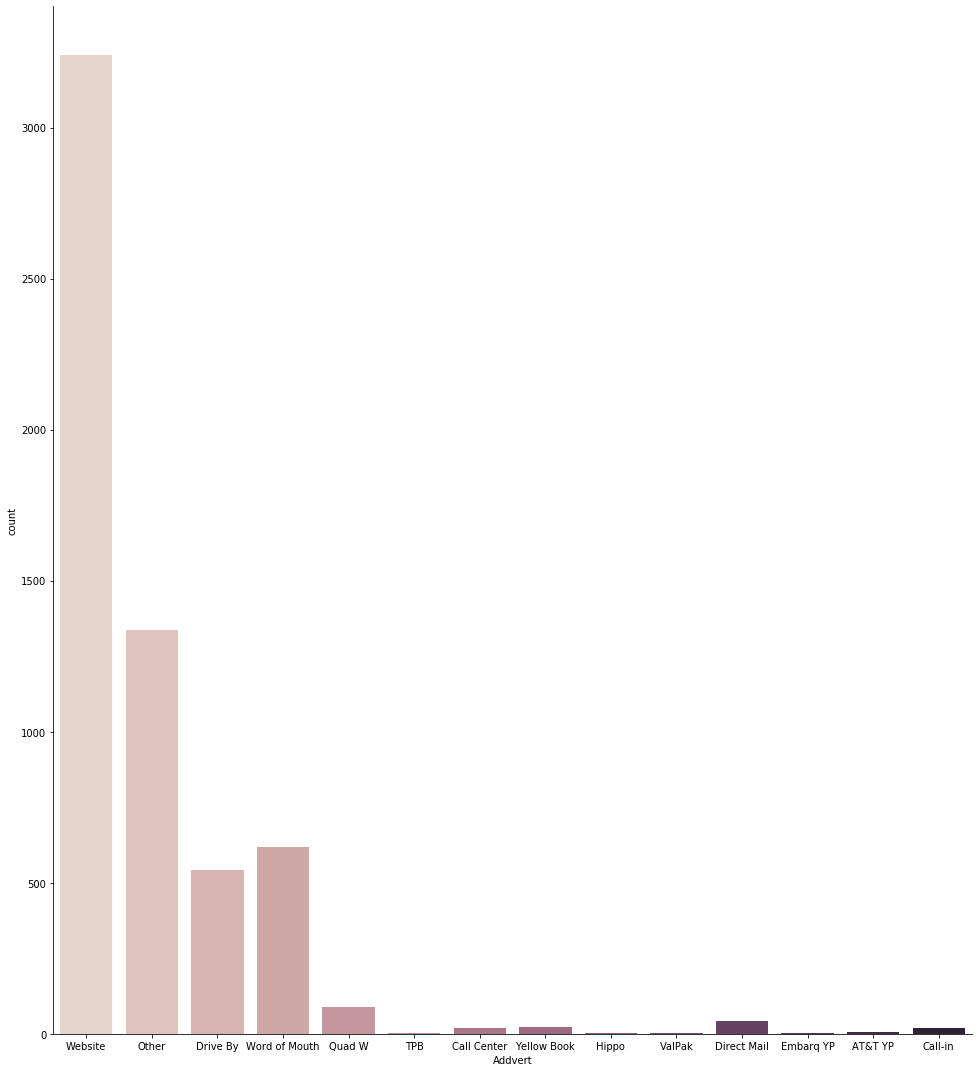

In [75]:
sns.catplot(x="Addvert", kind="count", palette="ch:.1", height=15, aspect=.9, data=data);

In [76]:
# Frequency table of PhoneStatus
pd.value_counts(data['PhoneStatus'])

# There is a third value of "2" but this feature only indicates if the status of the phone is active or not, so it is necessary to make an inputation with the most frequent value, in this case 0. 

0    3797
1    2046
2     101
Name: PhoneStatus, dtype: int64

In [77]:
data['PhoneStatus'] = [ 0 if x == 2 else x for x in data['PhoneStatus']]

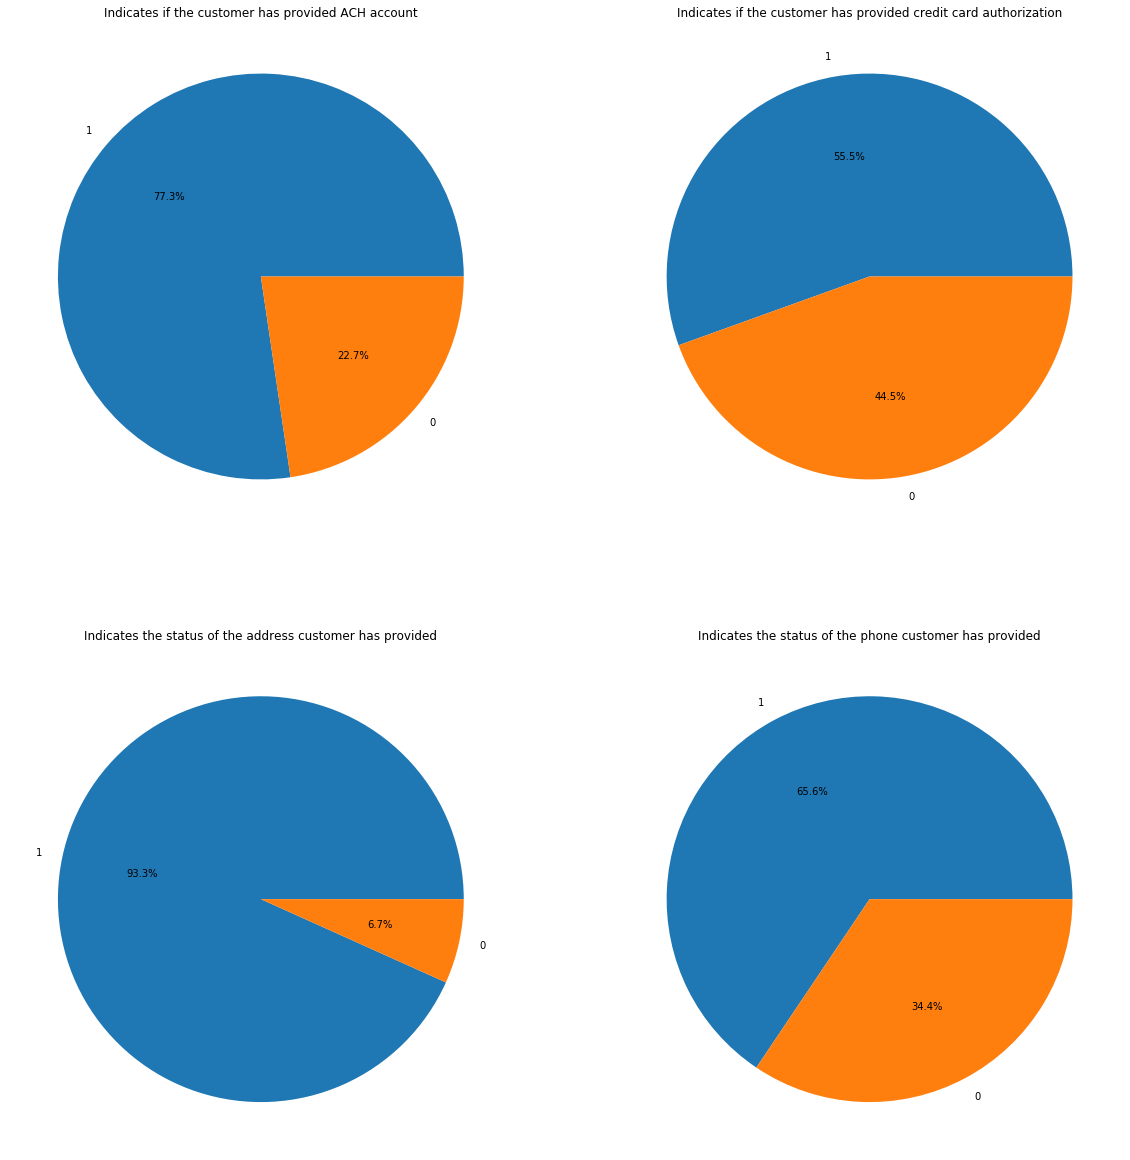

In [78]:
# Pie charts
f, ax = plt.subplots(figsize=(20, 21))

# Flag ACH
plt.subplot(2, 2, 1)
plt.title("Indicates if the customer has provided ACH account")
sums = data["flag_ACH"].value_counts()
labels = data["flag_ACH"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')


# ccAuth:
plt.subplot(2, 2, 2)
plt.title("Indicates if the customer has provided credit card authorization")
sums = data["ccAuth"].value_counts()
labels = data["ccAuth"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# AddressStatus
plt.subplot(2, 2, 3)
plt.title("Indicates the status of the address customer has provided")
sums = data["AddressStatus"].value_counts()
labels = data["AddressStatus"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# PhoneStatus
plt.subplot(2, 2, 4)
plt.title("Indicates the status of the phone customer has provided")
sums = data["PhoneStatus"].value_counts().tolist()
labels = data["PhoneStatus"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

plt.show()


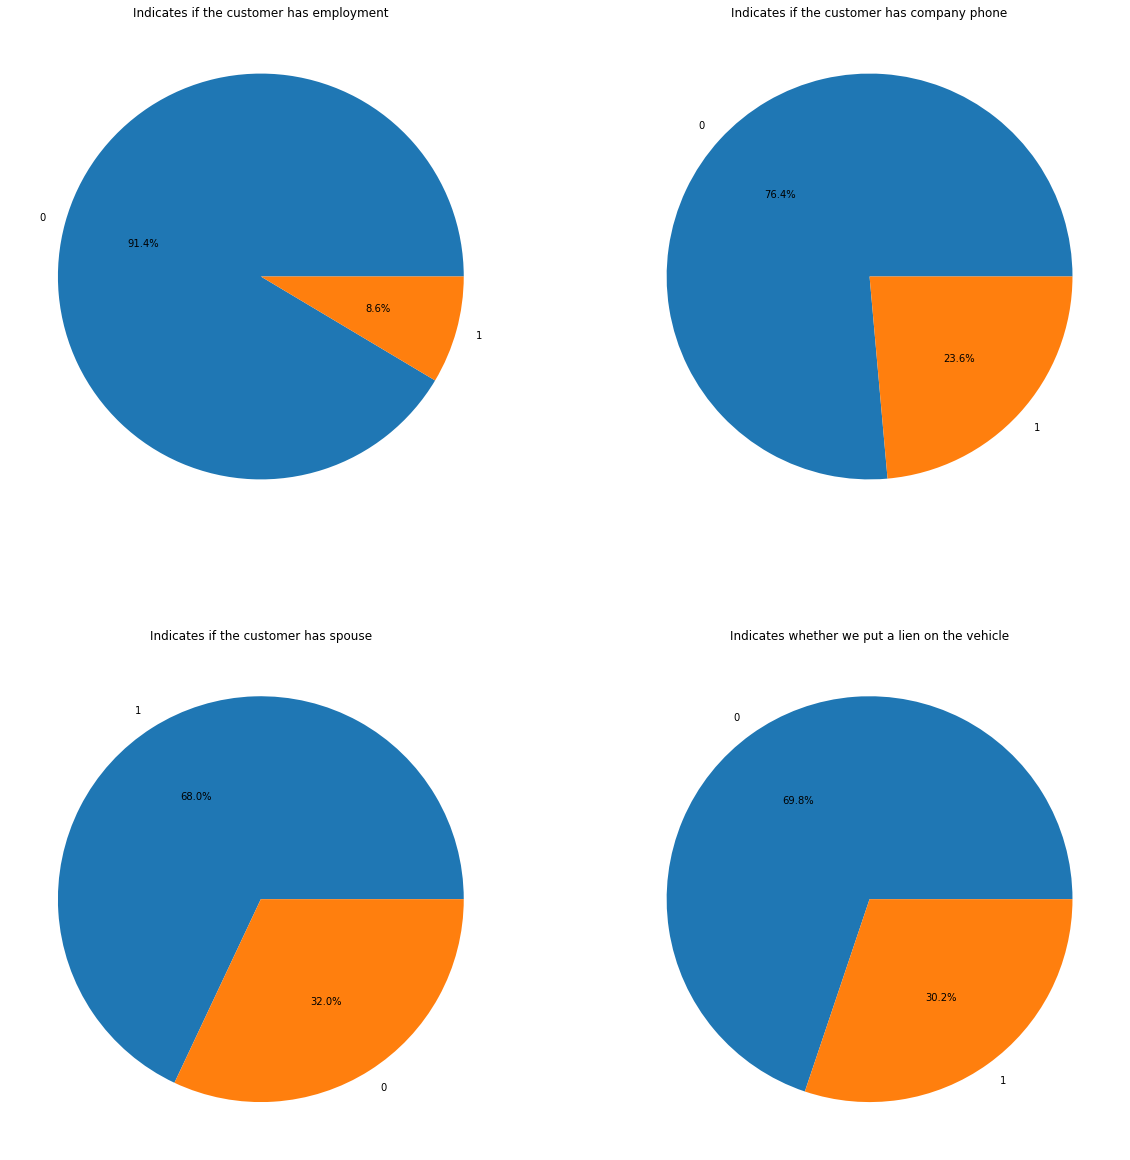

In [79]:
# Pie charts
f, ax = plt.subplots(figsize=(20, 21))

# flag_Employment:
plt.subplot(2, 2, 1)
plt.title("Indicates if the customer has employment")
sums = data["flag_Employment"].value_counts()
labels = data["flag_Employment"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')


# flag_CompanyPhone:
plt.subplot(2, 2, 2)
plt.title("Indicates if the customer has company phone")
sums = data["flag_CompanyPhone"].value_counts()
labels = data["flag_CompanyPhone"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# flag_Spouse
plt.subplot(2, 2, 3)
plt.title("Indicates if the customer has spouse")
sums = data["flag_Spouse"].value_counts()
labels = data["flag_Spouse"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Lien
plt.subplot(2, 2, 4)
plt.title("Indicates whether we put a lien on the vehicle")
sums = data["Lien"].value_counts().tolist()
labels = data["Lien"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

plt.show()

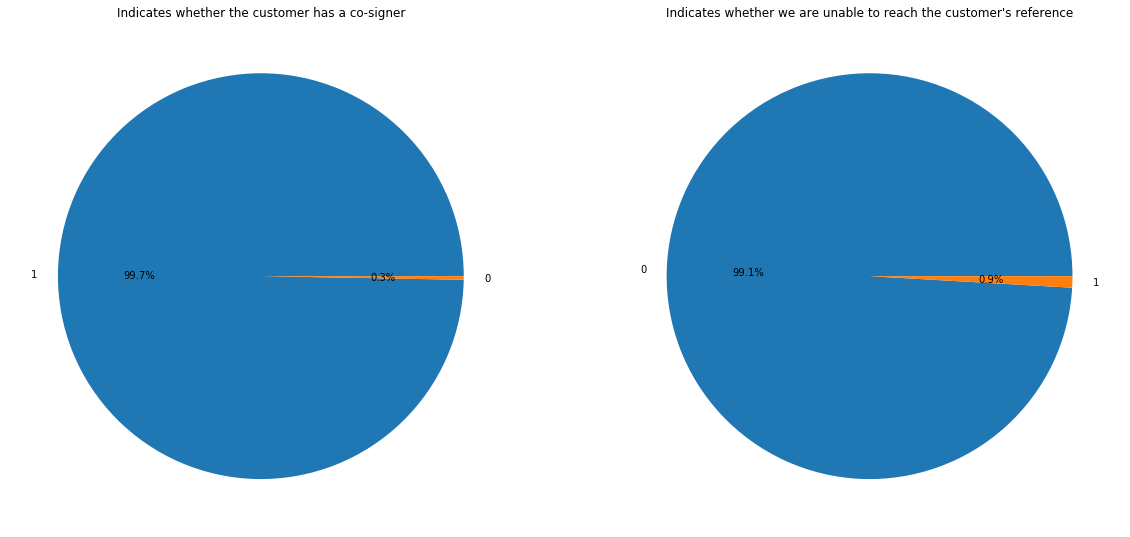

In [80]:
# Pie charts
f, ax = plt.subplots(figsize=(20, 21))

# flag_Cosigner
plt.subplot(2, 2, 1)
plt.title("Indicates whether the customer has a co-signer")
sums = data["flag_Cosigner"].value_counts()
labels = data["flag_Cosigner"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')


# BadReference
plt.subplot(2, 2, 2)
plt.title("Indicates whether we are unable to reach the customer's reference")
sums = data["BadReference"].value_counts()
labels = data["BadReference"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

plt.show()

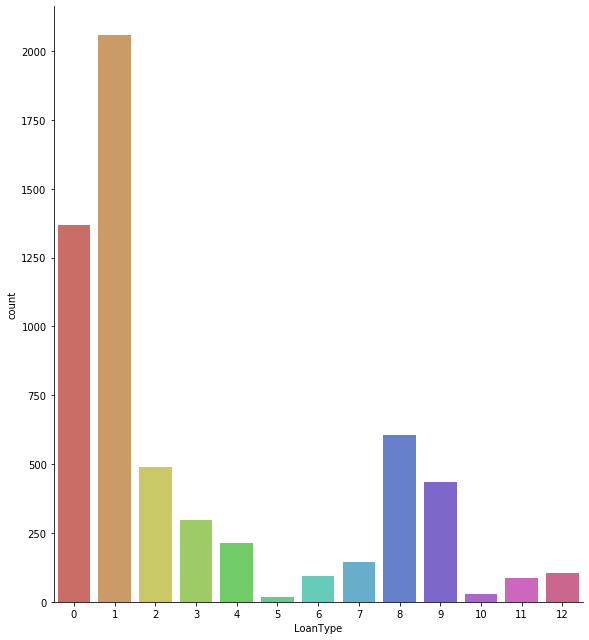

In [81]:
# The type of loan 
# In this case the names of the lines of credit have been encoded into numbers.
sns.catplot(x="LoanType", kind="count", palette="hls", height=9, aspect=.9, data=data);

### General Descriptive Overview for Categorical Data. 

* Office: in general terms, it can be seen that the distribution of the offices is not uniform and some have more branches than others, such as the Salem and Manchester offices, which have the largest number, while others, such as Beachton and Florida are the ones with the fewest offices.
* City: As for the cities, in which more credits are made is Jacksonville with 645 credits processed, followed by Pensacola, and some of the last ones are Ashford and Whgham.
* State: As for the state, it can be seen that the states in which the majority credits are processed are in Florida and Massachusetts, but they are not the ones with the largest number of offices, which gives us a brief idea that where there are more offices is not because there is more volume of credit analysis.
* Email domain: As for the email domain most used by customers is Gmail, second is Yahoo, although there are a significant number of observations that they do not have an associated email domain.
* CarMake: it can be seen how the most requested car for credit applications is Ford, followed by Chevrolet (cars of American origin) and third place Toyota (of Japanese origin) in last place are: Triumph, Fiat and FreightLiner.
* Car Model: the preferred car model is the Honda Accord, followed by the Explorer, and then the Camry. Although Honda is not one of the most prefer car as Ford, its Accord model is the number one that customers seek the most for credits.
* Car Year: for the cars in which the most credit applications are processed are for cars models 2003 and 2004 respectively, and it is seen that the models that are least requested are those before 1993 and after 2010.
* Addvert: more than 50% of credit applications come from people who saw advertising on the Internet and more than 22% claim to have seen it in another medium.
* Flag_ACH: 77.3% of applicants have an active bank account.
* CCauth: 55.5% of the applicants gave authorization to their credit card, while 44.5% did not give the authorization.
* AddressStatus: 93.3% of the applicants indicated their address.
* PhoneStatus: 65.6% of requests have an active phone.
* flag_Employment: 91.4% of applications come from people who do not have formal employment.
* flag_CompanyPhone: 76.4% of requests come from people who do not have a telephone in the company.
* flag_Spouse: 68% of the applicants have spouse.
* Lien: 69.8% of credit applications do not have a lien.
* flag_Cosigner: 99.7% of the requests have a co_signer.
* BadReference: in 99.1% of cases the bank could not obtain a reference from the customer.
* Loan Type: the type of loan that is most requested is the type “1” loan. More than 2000 people requested it.

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5944 entries, 0 to 5975
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Office             5944 non-null   object 
 1   CustomerID         5944 non-null   object 
 2   City               5944 non-null   object 
 3   State              5944 non-null   object 
 4   EmailDomain        5944 non-null   object 
 5   CarMake            5944 non-null   object 
 6   CarModel           5944 non-null   object 
 7   CarYear            5944 non-null   int64  
 8   CarValue           5944 non-null   float64
 9   AgeOfCustomer      5944 non-null   int64  
 10  Addvert            5944 non-null   object 
 11  flag_ACH           5944 non-null   int64  
 12  ccAuth             5944 non-null   int64  
 13  AddressStatus      5944 non-null   int64  
 14  PhoneStatus        5944 non-null   int64  
 15  flag_Employment    5944 non-null   int64  
 16  flag_CompanyPhone  5944 

In [83]:
# It is necessary to transform the nominal categorical variables to numbers using the standarcard scaler to analyze them 

# Convierte las variables de object a categórica
data['Office'] = data['Office'].astype('category')
data['City'] = data['City'].astype('category')
data['State'] = data['State'].astype('category')
data['EmailDomain'] = data['EmailDomain'].astype('category')
data['CarMake'] = data['CarMake'].astype('category')
data['CarModel'] = data['CarModel'].astype('category')
data['Addvert'] = data['Addvert'].astype('category')
print(data.info())
print(data.head())
# Recodifica las categorías usando números
data['Office'] = data['Office'].cat.codes
data['City'] = data['City'].cat.codes
data['State'] = data['State'].cat.codes
data['EmailDomain'] = data['EmailDomain'].cat.codes
data['CarMake'] = data['CarMake'].cat.codes
data['CarModel'] = data['CarModel'].cat.codes
data['Addvert'] = data['Addvert'].cat.codes
print(data.info())
print(data.head())
# Convierte las variables de entero a categórica
data['Office'] = data['Office'].astype('category')
data['City'] = data['City'].astype('category')
data['State'] = data['State'].astype('category')
data['EmailDomain'] = data['EmailDomain'].astype('category')
data['CarMake'] = data['CarMake'].astype('category')
data['CarModel'] = data['CarModel'].astype('category')
data['Addvert'] = data['Addvert'].astype('category')
data['PhoneStatus']= data['PhoneStatus'].astype('category')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5944 entries, 0 to 5975
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Office             5944 non-null   category
 1   CustomerID         5944 non-null   object  
 2   City               5944 non-null   category
 3   State              5944 non-null   category
 4   EmailDomain        5944 non-null   category
 5   CarMake            5944 non-null   category
 6   CarModel           5944 non-null   category
 7   CarYear            5944 non-null   int64   
 8   CarValue           5944 non-null   float64 
 9   AgeOfCustomer      5944 non-null   int64   
 10  Addvert            5944 non-null   category
 11  flag_ACH           5944 non-null   int64   
 12  ccAuth             5944 non-null   int64   
 13  AddressStatus      5944 non-null   int64   
 14  PhoneStatus        5944 non-null   int64   
 15  flag_Employment    5944 non-null   int64   
 16  flag_C

### Evaluating how to deal with outliers: First Method -> imputation

In [84]:
data.var()

Office               8.013606e+00
CustomerID           1.107601e+07
City                 2.314891e+04
State                2.194310e+01
EmailDomain          3.606347e+03
CarMake              1.315437e+02
CarModel             9.406434e+04
CarYear              2.248202e+01
CarValue             9.278811e+06
AgeOfCustomer        1.592784e+02
Addvert              6.917072e+00
flag_ACH             1.752902e-01
ccAuth               2.470151e-01
AddressStatus        6.277673e-02
PhoneStatus          2.257683e-01
flag_Employment      7.831281e-02
flag_CompanyPhone    1.802647e-01
PaidFrequency        7.062644e-01
AnnualSalary         6.300301e+08
flag_Spouse          2.176318e-01
LoanType             1.189368e+01
LoanAmount           3.446897e+05
LoanInterest         1.229042e+01
Maturity             4.163678e-01
Lien                 2.106922e-01
flag_Cosigner        2.852327e-03
BadReference         9.003773e-03
Default              1.116558e-01
dtype: float64

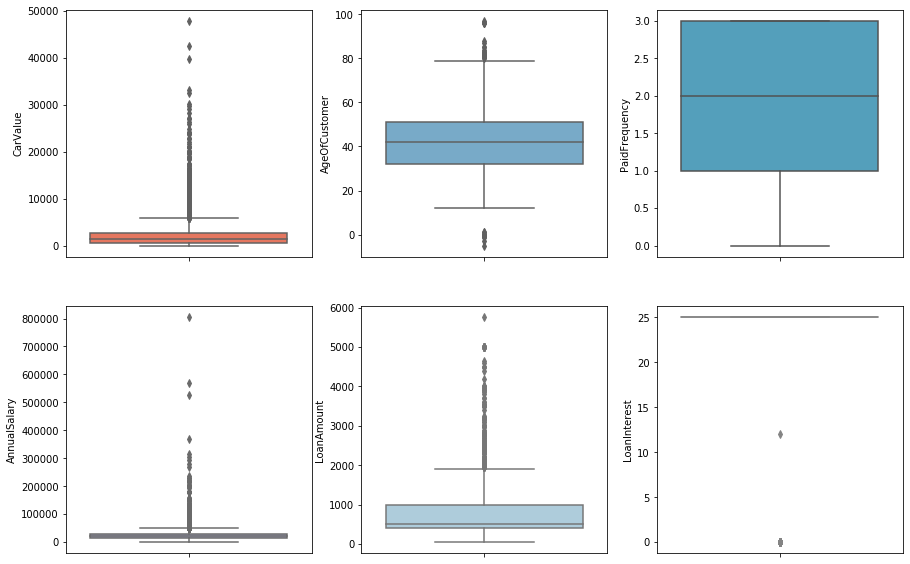

In [85]:
#### Boxplots

f, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(x= "CarValue", data=data,  orient='v' , ax=axes[0][0],  palette="Reds")
sns.boxplot(x= "AgeOfCustomer", data=data,  orient='v' , ax=axes[0][1],  palette="Blues")
sns.boxplot(x= "PaidFrequency", data=data,  orient='v' , ax=axes[0][2],  palette="GnBu_d")
sns.boxplot(x= "AnnualSalary", data=data,  orient='v' , ax=axes[1][0],  palette="Purples")
sns.boxplot(x= "LoanAmount", data=data,  orient='v' , ax=axes[1][1],  palette="Paired")
sns.boxplot(x= "LoanInterest", data=data,  orient='v' , ax=axes[1][2],  palette=sns.cubehelix_palette(8));

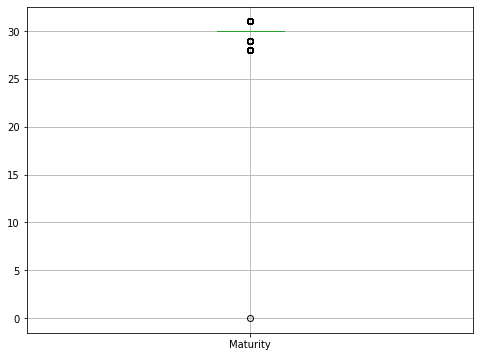

In [86]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
data.boxplot(column='Maturity', ax=ax);

#### Car Value Outliers

* Despite the fact CarValue has importante and high outliers and they are relevant because they represent the real amount of every vehicule, and analyzing the CarMake there are some of luxury brands as: BMW, Volvo, Mercedes Benz, Dogde, Audi, Lexus, but in order to decrease and try to standarize the data, will be performed imputation with the IQR by the median because the majority of data is lower than $5850 and if the outliers are not handled they can affect negatively the model. 

In [87]:
Q3, Q1 = np.percentile(data['CarValue'], [75 ,25])
IQR = Q3 - Q1
print(IQR)

2100.0


In [88]:
Lower_Bound = Q1 - (1.5 * IQR)
Upper_Bound = Q3 + (1.5 * IQR)
print(Lower_Bound)
print(Upper_Bound)

-2550.0
5850.0


In [89]:
print(Upper_Bound)

5850.0


In [90]:
higher = (data['CarValue'] > 5850)
data[higher]

,Office,CustomerID,City,State,EmailDomain,CarMake,CarModel,CarYear,CarValue,AgeOfCustomer,...,AnnualSalary,flag_Spouse,LoanType,LoanAmount,LoanInterest,Maturity,Lien,flag_Cosigner,BadReference,Default
0,9,782,119,9,179,28,745,2011,8000.0,57,...,19999.0,1,6,1000.0,25,31,0,1,0,1
1,9,783,119,9,179,28,745,2011,8000.0,57,...,19999.0,1,6,1000.0,25,31,0,1,0,1
4,7,1109,252,9,1,13,728,2011,11600.0,40,...,75226.8,1,2,1500.0,25,30,0,0,0,0
6,7,1102,391,15,100,38,806,2010,6275.0,45,...,28800.0,1,1,400.0,25,30,0,0,0,0
12,9,753,375,15,107,18,1074,2004,6825.0,67,...,96000.0,1,0,5000.0,25,31,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,4,11973,263,2,107,7,318,2015,20250.0,32,...,25596.0,1,0,1000.0,25,30,0,0,0,0
5875,4,9749,263,2,120,38,273,2009,6150.0,36,...,57804.0,1,0,2400.0,25,30,0,0,0,0
5877,2,1560,446,2,29,6,36,2008,7950.0,42,...,19200.0,1,3,1000.0,25,30,1,0,0,0
5879,8,101,211,2,29,9,427,2010,11275.0,50,...,21360.0,1,0,1000.0,25,30,1,0,0,0


In [91]:
data['CarValue'].median()

1375.0

In [92]:
data['CarValue'] = [1375 if x > 5850 else x for x in data['CarValue']]

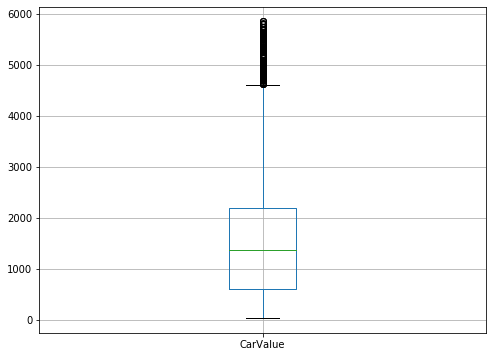

In [93]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
data.boxplot(column='CarValue', ax=ax);

#### Age Of Customer Outliers

Age Of Customer: in this case there are outliers low and hight, some of them are from customers that are < 18 years old and for every loan it is necessary that a person will be more than 18 years in the majority of states and there are others that have more than 80 years and in some countries there are certain policies fro those kind of people, they need to pay a higher insurance of they are not longer to be considered for a loan due to their age, so outliers will be handled using the IQR for the outliers higher and 18 will be the limit for lower ages. 

In [94]:
Q3, Q1 = np.percentile(data['AgeOfCustomer'], [75 ,25])
IQR = Q3 - Q1
print(IQR)

19.0


In [95]:
Lower_Bound = Q1 - (1.5 * IQR)
Upper_Bound = Q3 + (1.5 * IQR)
print(Lower_Bound)
print(Upper_Bound)

3.5
79.5


In [96]:
higher = (data['AgeOfCustomer'] < 18)
data[higher]

,Office,CustomerID,City,State,EmailDomain,CarMake,CarModel,CarYear,CarValue,AgeOfCustomer,...,AnnualSalary,flag_Spouse,LoanType,LoanAmount,LoanInterest,Maturity,Lien,flag_Cosigner,BadReference,Default
102,7,943,219,9,100,4,366,2007,1375.0,0,...,64992.0,1,7,5000.0,25,30,1,0,0,0
130,9,629,47,9,71,12,1098,2017,1375.0,0,...,78624.0,0,0,5000.0,25,30,1,0,0,0
307,7,771,53,9,56,38,273,2010,4150.0,0,...,34800.0,1,8,2000.0,25,30,1,0,0,0
742,7,550,626,9,100,9,454,2001,500.0,1,...,12576.0,1,1,400.0,25,30,0,0,0,0
823,7,516,540,9,44,5,157,2009,1575.0,0,...,24000.0,0,2,400.0,25,28,0,0,0,0
1736,7,98,522,9,44,38,204,2007,1375.0,-3,...,53757.0,1,8,3200.0,25,31,1,0,0,0
3299,4,9207,263,2,192,9,368,2003,2175.0,0,...,30000.0,1,3,700.0,25,30,1,0,0,0
3865,1,823,548,2,100,31,533,1997,375.0,0,...,13766.0,1,1,400.0,25,30,1,0,0,0
3970,10,278,431,2,100,28,41,1990,875.0,-1,...,18000.0,0,1,400.0,25,30,1,0,0,0
4141,3,2643,613,2,189,37,1091,2004,800.0,-1,...,23232.0,1,4,700.0,25,30,0,0,0,0


In [97]:
higher = (data['AgeOfCustomer'] > 79.5)
data[higher]

,Office,CustomerID,City,State,EmailDomain,CarMake,CarModel,CarYear,CarValue,AgeOfCustomer,...,AnnualSalary,flag_Spouse,LoanType,LoanAmount,LoanInterest,Maturity,Lien,flag_Cosigner,BadReference,Default
105,9,648,496,9,71,6,771,2008,500.0,82,...,14292.00,1,1,500.0,25,31,1,0,0,0
121,7,914,314,9,118,40,739,2007,1175.0,96,...,22634.56,1,1,600.0,25,31,1,0,0,0
159,6,446,325,15,29,27,486,2011,1875.0,85,...,19680.00,1,0,500.0,25,31,1,0,0,0
584,7,627,526,9,189,28,130,2012,4625.0,81,...,14616.00,0,0,1200.0,25,31,1,0,0,0
630,9,449,65,9,29,38,204,2000,2275.0,81,...,31118.00,1,8,1700.0,25,31,1,0,0,0
890,7,488,341,9,189,38,154,2006,3200.0,85,...,16308.00,0,0,800.0,25,31,1,0,0,0
956,6,270,326,15,29,5,172,1999,925.0,88,...,22800.00,0,1,500.0,0,31,1,0,0,0
1622,6,93,541,15,189,38,806,2004,2438.0,81,...,23256.00,1,8,850.0,25,31,1,0,0,1
2262,2,2103,304,0,29,9,290,2004,2200.0,83,...,21600.00,0,0,1000.0,25,30,1,0,0,0
3000,1,1538,548,2,3,27,337,2000,1200.0,81,...,18732.00,0,9,600.0,25,30,1,0,0,0


In [98]:
pd.value_counts(data['AgeOfCustomer'])

 33    177
 31    176
 40    173
 46    171
 37    170
      ... 
 97      1
 17      1
-3       1
 88      1
 87      1
Name: AgeOfCustomer, Length: 80, dtype: int64

In [99]:
data['AgeOfCustomer'] = [42 if x > 79.5 or x < 18  else x for x in data['AgeOfCustomer']]

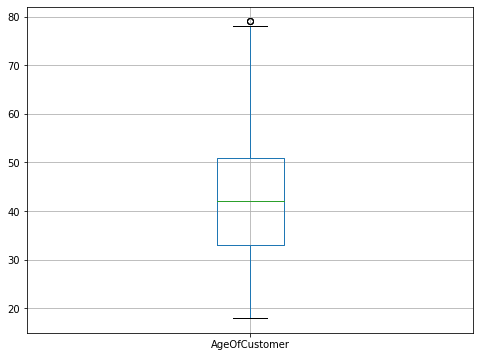

In [100]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
data.boxplot(column='AgeOfCustomer', ax=ax);

#### Paid Frequency 

There are some of 0 values that must be an error because although it is true that some customers may not have a company that pays them, they may have their own lucrative activities or receive royalties in the form of money from third parties or from the family and this is taken as their own income or salary, so "0" values will be handled with the median as well. 

In [101]:
pd.value_counts(data['PaidFrequency'])

2.0    2263
3.0    1864
1.0    1644
0.0     173
Name: PaidFrequency, dtype: int64

In [102]:
data['PaidFrequency'].median()

2.0

In [103]:
data['PaidFrequency'] = [2 if x == 0 else x for x in data['PaidFrequency']]

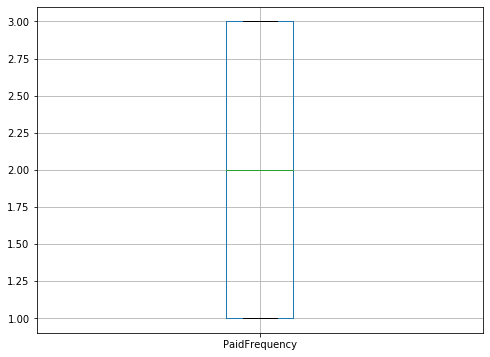

In [104]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
data.boxplot(column='PaidFrequency', ax=ax);

#### Annual Salary Outliers 

* Despite the fact some customers can have high salaries and they are relevant the boxplot shows that the majority of people receive less than $100k per year, so for create a robust score it is necessary to reduce the margin of salaries located in high positions so they will be imputed with the median and IQR. 


In [105]:
Q3, Q1 = np.percentile(data['AnnualSalary'], [75 ,25])
IQR = Q3 - Q1
print(IQR)

14326.36


In [106]:
Lower_Bound = Q1 - (1.5 * IQR)
Upper_Bound = Q3 + (1.5 * IQR)
print(Lower_Bound)
print(Upper_Bound)

-6947.4000000000015
50358.04


In [107]:
data['AnnualSalary'].median()

19999.0

In [108]:
data['AnnualSalary'] = [19999 if x > 50358.04 else x for x in data['AnnualSalary']]

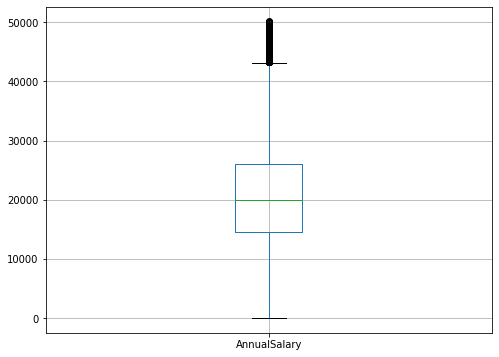

In [109]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
data.boxplot(column='AnnualSalary', ax=ax);

#### Loan Amount Outliers

In this case there are outliers due to some loan amount higher than the average, so the process of imputing will be the same using IQR and median. 

In [110]:
Q3, Q1 = np.percentile(data['LoanAmount'], [75 ,25])
IQR = Q3 - Q1
print(IQR)

600.0


In [111]:
Lower_Bound = Q1 - (1.5 * IQR)
Upper_Bound = Q3 + (1.5 * IQR)
print(Lower_Bound)
print(Upper_Bound)

-500.0
1900.0


In [112]:
print(data['LoanAmount'].median())
print(data['LoanAmount'].mean())

500.0
746.0381695827725


In [113]:
data['LoanAmount'] = [500 if x > 1900 else x for x in data['LoanAmount']]

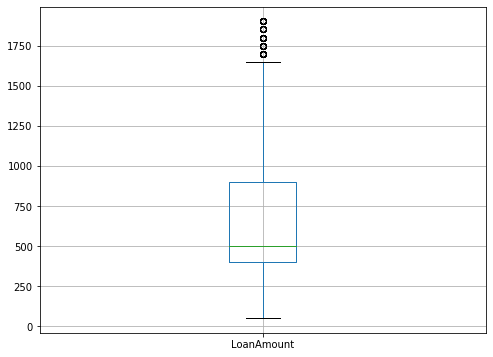

In [114]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
data.boxplot(column='LoanAmount', ax=ax);

#### Loan Interest Outliers

Boxplots shows 2 outliers lower than 25% one is 12 and the other one is 0, in credit does not exist 0 interest so it must be an error and the 12 it would be imputed with the standard 25 percent. 

In [115]:
pd.value_counts(data['LoanInterest'])

25    5824
0      119
12       1
Name: LoanInterest, dtype: int64

In [116]:
data['LoanInterest'] = [25 if x == 0 or x == 12 else x for x in data['LoanInterest']]

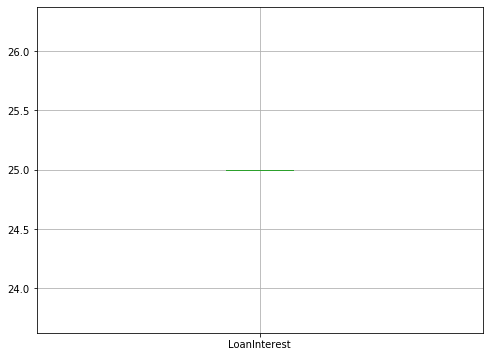

In [117]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
data.boxplot(column='LoanInterest', ax=ax);

### Maturity outliers 

In the loan cycle there is a value of 0 which is an error, since the values that have are 28 days (for February when it is a leap year) 29 days for February (normal year) 30 and 31 days for the other months, then 0 will be corrected.

In [118]:
print(pd.value_counts(data['Maturity']))
print(data['Maturity'].median())

30    4652
31    1111
28     128
29      52
0        1
Name: Maturity, dtype: int64
30.0


In [119]:
data['Maturity'] = [30 if x == 0 else x for x in data['Maturity']]

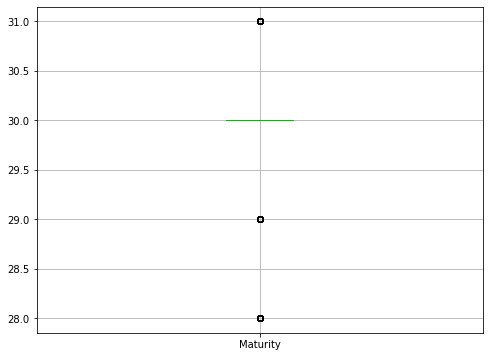

In [120]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
data.boxplot(column='Maturity', ax=ax);

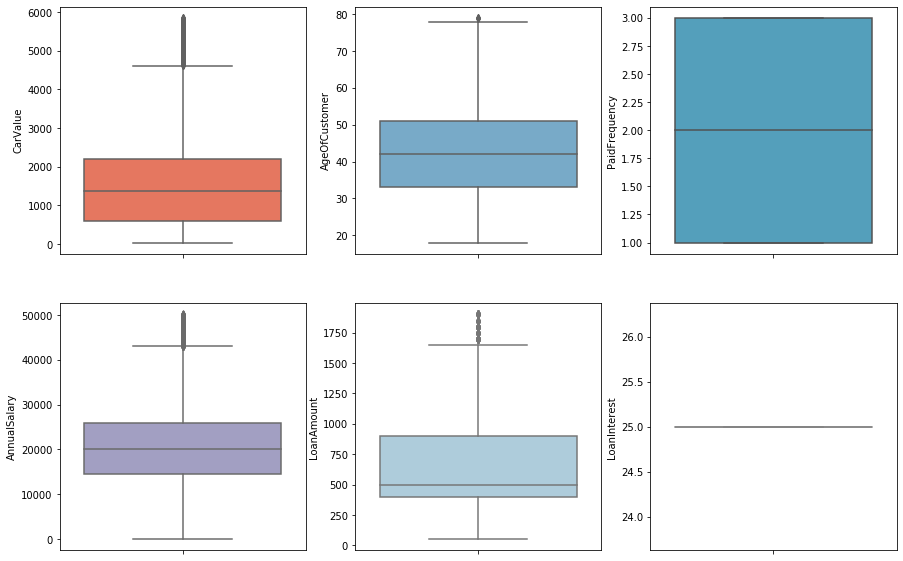

In [121]:
#### Boxplots

f, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(x= "CarValue", data=data,  orient='v' , ax=axes[0][0],  palette="Reds")
sns.boxplot(x= "AgeOfCustomer", data=data,  orient='v' , ax=axes[0][1],  palette="Blues")
sns.boxplot(x= "PaidFrequency", data=data,  orient='v' , ax=axes[0][2],  palette="GnBu_d")
sns.boxplot(x= "AnnualSalary", data=data,  orient='v' , ax=axes[1][0],  palette="Purples")
sns.boxplot(x= "LoanAmount", data=data,  orient='v' , ax=axes[1][1],  palette="Paired")
sns.boxplot(x= "LoanInterest", data=data,  orient='v' , ax=axes[1][2],  palette=sns.cubehelix_palette(8));

In [122]:
data.var()

Office               8.013606e+00
CustomerID           1.107601e+07
City                 2.314891e+04
State                2.194310e+01
EmailDomain          3.606347e+03
CarMake              1.315437e+02
CarModel             9.406434e+04
CarYear              2.248202e+01
CarValue             1.599981e+06
AgeOfCustomer        1.455935e+02
Addvert              6.917072e+00
flag_ACH             1.752902e-01
ccAuth               2.470151e-01
AddressStatus        6.277673e-02
PhoneStatus          2.257683e-01
flag_Employment      7.831281e-02
flag_CompanyPhone    1.802647e-01
PaidFrequency        5.889041e-01
AnnualSalary         9.807611e+07
flag_Spouse          2.176318e-01
LoanType             1.189368e+01
LoanAmount           1.234839e+05
LoanInterest         0.000000e+00
Maturity             2.635907e-01
Lien                 2.106922e-01
flag_Cosigner        2.852327e-03
BadReference         9.003773e-03
Default              1.116558e-01
dtype: float64

### Second method -> Deleting outliers

In [84]:
higher = (data['CarValue'] > 5850)
data[higher]

,Office,CustomerID,City,State,EmailDomain,CarMake,CarModel,CarYear,CarValue,AgeOfCustomer,...,AnnualSalary,flag_Spouse,LoanType,LoanAmount,LoanInterest,Maturity,Lien,flag_Cosigner,BadReference,Default
0,9,782,119,9,179,28,745,2011,8000.0,57,...,19999.0,1,6,1000.0,25,31,0,1,0,1
1,9,783,119,9,179,28,745,2011,8000.0,57,...,19999.0,1,6,1000.0,25,31,0,1,0,1
4,7,1109,252,9,1,13,728,2011,11600.0,40,...,75226.8,1,2,1500.0,25,30,0,0,0,0
6,7,1102,391,15,100,38,806,2010,6275.0,45,...,28800.0,1,1,400.0,25,30,0,0,0,0
12,9,753,375,15,107,18,1074,2004,6825.0,67,...,96000.0,1,0,5000.0,25,31,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,4,11973,263,2,107,7,318,2015,20250.0,32,...,25596.0,1,0,1000.0,25,30,0,0,0,0
5875,4,9749,263,2,120,38,273,2009,6150.0,36,...,57804.0,1,0,2400.0,25,30,0,0,0,0
5877,2,1560,446,2,29,6,36,2008,7950.0,42,...,19200.0,1,3,1000.0,25,30,1,0,0,0
5879,8,101,211,2,29,9,427,2010,11275.0,50,...,21360.0,1,0,1000.0,25,30,1,0,0,0


In [85]:
data = data.drop(data[data['CarValue'] > 5850].index)

In [86]:
# Age of Custometr
data = data.drop(data[data['AgeOfCustomer'] < 18].index)
data = data.drop(data[data['AgeOfCustomer'] > 79.5].index)

In [87]:
# Paid Frequency
data = data.drop(data[data['PaidFrequency'] == 0].index)

In [88]:
# Annual Salary
data = data.drop(data[data['AnnualSalary'] > 50358.04].index)

In [89]:
# Loan Amount
data = data.drop(data[data['LoanAmount'] > 1900].index)

In [90]:
# Loan Interest
data = data.drop(data[data['LoanInterest'] == 0].index)
data = data.drop(data[data['LoanInterest'] == 12].index)

In [91]:
# Maturity
data = data.drop(data[data['Maturity'] == 0].index)

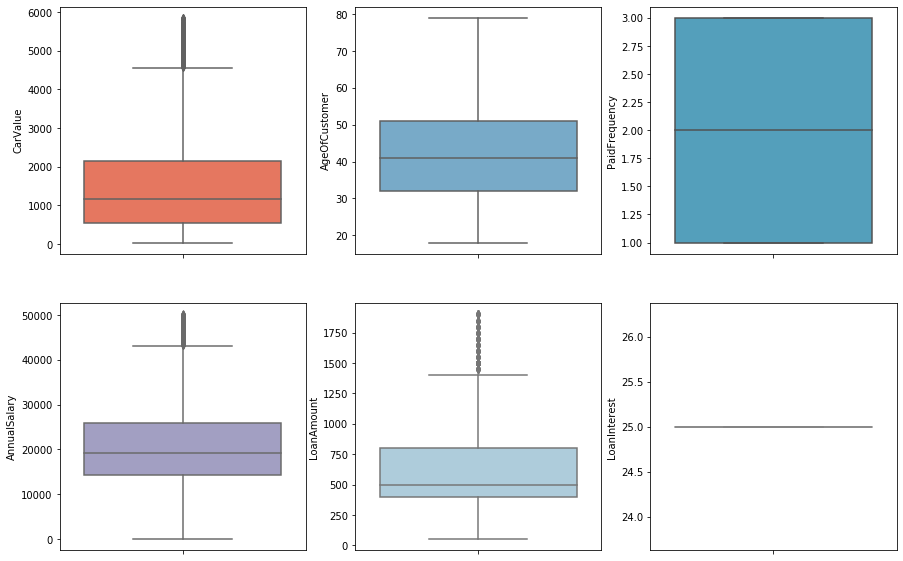

In [92]:
#### Boxplots

f, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(x= "CarValue", data=data,  orient='v' , ax=axes[0][0],  palette="Reds")
sns.boxplot(x= "AgeOfCustomer", data=data,  orient='v' , ax=axes[0][1],  palette="Blues")
sns.boxplot(x= "PaidFrequency", data=data,  orient='v' , ax=axes[0][2],  palette="GnBu_d")
sns.boxplot(x= "AnnualSalary", data=data,  orient='v' , ax=axes[1][0],  palette="Purples")
sns.boxplot(x= "LoanAmount", data=data,  orient='v' , ax=axes[1][1],  palette="Paired")
sns.boxplot(x= "LoanInterest", data=data,  orient='v' , ax=axes[1][2],  palette=sns.cubehelix_palette(8));

In [93]:
data.var()

Office               8.004086e+00
CustomerID           1.126633e+07
City                 2.267438e+04
State                2.187933e+01
EmailDomain          3.643005e+03
CarMake              1.295616e+02
CarModel             9.351771e+04
CarYear              1.859363e+01
CarValue             1.534241e+06
AgeOfCustomer        1.514070e+02
Addvert              7.013770e+00
flag_ACH             1.714613e-01
ccAuth               2.453873e-01
AddressStatus        6.675887e-02
PhoneStatus          2.191933e-01
flag_Employment      8.102338e-02
flag_CompanyPhone    1.815727e-01
PaidFrequency        6.046355e-01
AnnualSalary         9.724995e+07
flag_Spouse          2.179429e-01
LoanType             1.196262e+01
LoanAmount           1.161381e+05
LoanInterest         0.000000e+00
Maturity             2.517904e-01
Lien                 2.015505e-01
flag_Cosigner        2.068672e-03
BadReference         8.630681e-03
Default              1.159846e-01
dtype: float64

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5944 entries, 0 to 5975
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Office             5944 non-null   category
 1   CustomerID         5944 non-null   object  
 2   City               5944 non-null   category
 3   State              5944 non-null   category
 4   EmailDomain        5944 non-null   category
 5   CarMake            5944 non-null   category
 6   CarModel           5944 non-null   category
 7   CarYear            5944 non-null   int64   
 8   CarValue           5944 non-null   float64 
 9   AgeOfCustomer      5944 non-null   int64   
 10  Addvert            5944 non-null   category
 11  flag_ACH           5944 non-null   int64   
 12  ccAuth             5944 non-null   int64   
 13  AddressStatus      5944 non-null   int64   
 14  PhoneStatus        5944 non-null   category
 15  flag_Employment    5944 non-null   int64   
 16  flag_C

### Analysis of Outliers

Based on hipothesis testing and Tukey Test, deleting outliers do not represent any benefit for the model, because the variance is pretty similar and the other parameters are still giving same results. Moreover, deleting observations will cause that more than 1K will be deleting only working with 4825, so under this premise it is better to work with imputated variables. 

#### General Descriptive Overview for Numeric Data

* PaidFrequency: Most people get paid or receive income twice a month.
* AnnualSalary: the annual salary that clients receive is less than USD 100k per year, even 50 percent of people receive a salary of  USD 19999 per year, while there are people who earn more than USD 50K per year.
* LoanAmount: credit range goes from USD 100 to USD 2500 where there are even some outliers that are from the cars that have a higher price after standardization. 50 % of credits are USD 500 or less. The average is USD 639.85.
* LoanInterest: the interest on loans is 25 %.
* Maturity: corresponds to the billing cycle of the loan, most are 30 days.
* Age Of Customer: 50 % of customers are 42 years old or younger, while the second age in which more credits are requested is for customers who are 33 years old. Among the clients who request fewer credits are those who are 18 years old and 73 years old.


In [124]:
data['CarYear']= data['CarYear'].astype('int')
data['flag_ACH']= data['flag_ACH'].astype('int')
data['ccAuth']= data['ccAuth'].astype('int')
data['AddressStatus']= data['AddressStatus'].astype('int')
data['PhoneStatus']= data['PhoneStatus'].astype('int')
data['flag_Employment']= data['flag_Employment'].astype('int')
data['flag_CompanyPhone']= data['flag_CompanyPhone'].astype('int')
data['flag_Spouse']= data['flag_Spouse'].astype('int')
data['LoanType']= data['LoanType'].astype('int')
data['flag_Cosigner']= data['flag_Cosigner'].astype('int')
data['BadReference']= data['BadReference'].astype('int')
data['Lien']= data['Lien'].astype('int')
data['Default']= data['Default'].astype('int')

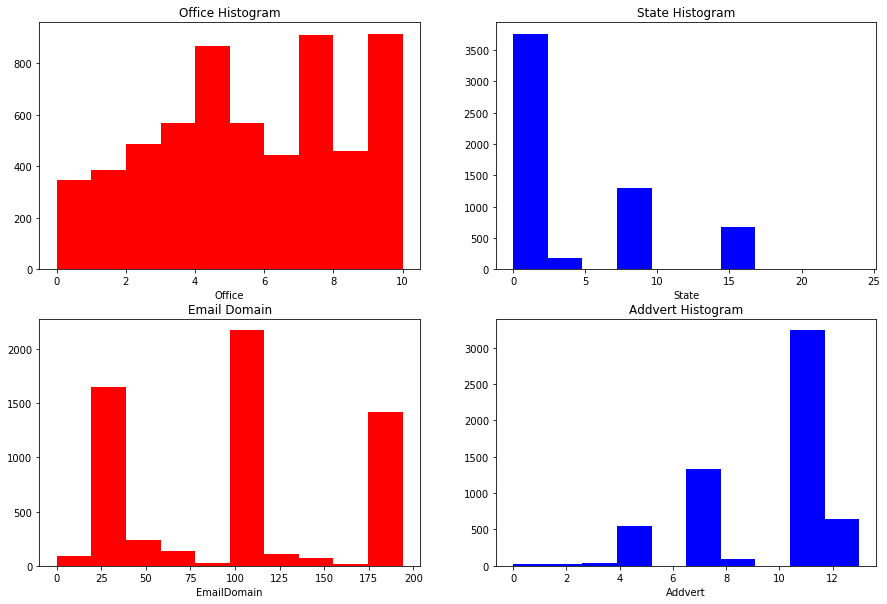

In [125]:
plt.figure(figsize=(15,10))

# Office Histogram
plt.subplot(2, 2, 1)
plt.hist(data['Office'], color = 'red')
plt.title('Office Histogram')
plt.xlabel('Office')


plt.subplot(2, 2, 2)
plt.hist(data['State'], color = 'blue')
plt.title('State Histogram')
plt.xlabel('State')


# Email Domain
plt.subplot(2, 2, 3)
plt.hist(data['EmailDomain'], color = 'red')
plt.title('Email Domain')
plt.xlabel('EmailDomain')

# Addvert Histogram
plt.subplot(2, 2, 4)
plt.hist(data['Addvert'], color = 'blue')
plt.title('Addvert Histogram')
plt.xlabel('Addvert')

plt.show()

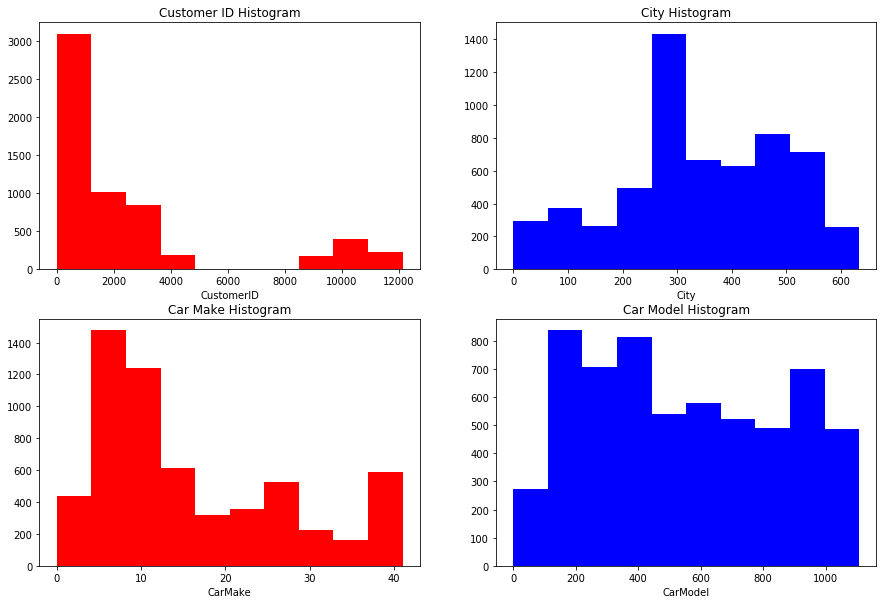

In [126]:
plt.figure(figsize=(15,10))

# Customer ID Histogram
plt.subplot(2, 2, 1)
plt.hist(data['CustomerID'], color = 'red')
plt.title('Customer ID Histogram')
plt.xlabel('CustomerID')

# City
plt.subplot(2, 2, 2)
plt.hist(data['City'], color = 'blue')
plt.title('City Histogram')
plt.xlabel('City')


# Car Make
plt.subplot(2, 2, 3)
plt.hist(data['CarMake'], color = 'red')
plt.title('Car Make Histogram')
plt.xlabel('CarMake')

# Car Model
plt.subplot(2, 2, 4)
plt.hist(data['CarModel'], color = 'blue')
plt.title('Car Model Histogram')
plt.xlabel('CarModel')

plt.show()

#### These histigrams help us to understand that categorical data does not follow a binomial distribution curve.

#### Analysis of numeric and categorical data for State where live the majority of people with loan operations - Florida (2) 

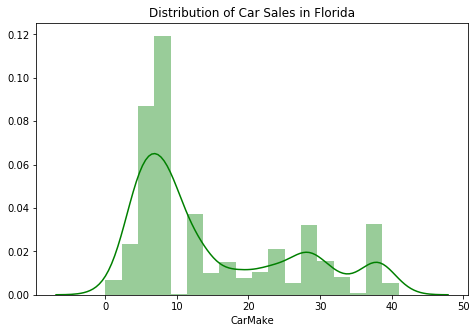

In [127]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[data["State"]== 2]['CarMake'],color='green',ax=ax)
ax.set_title('Distribution of Car Sales in Florida')

plt.show()

In [128]:
# First histogram shows that for people with loan in Florida, they prefer Ford (9 label) and Chevrolet (5 label)

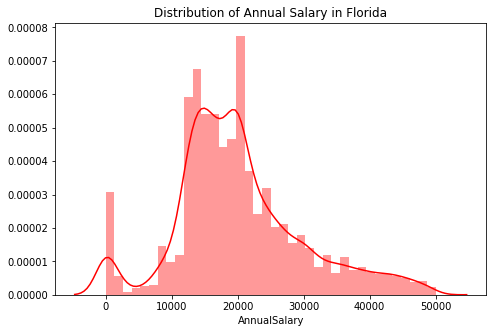

In [129]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[data["State"]== 2]['AnnualSalary'],color='red',ax=ax)
ax.set_title('Distribution of Annual Salary in Florida')


plt.show()

In [130]:
# There are a significant number of people who live in Florida with a salary of almost $20K per year, and salary limits for these people is almost $50k. 

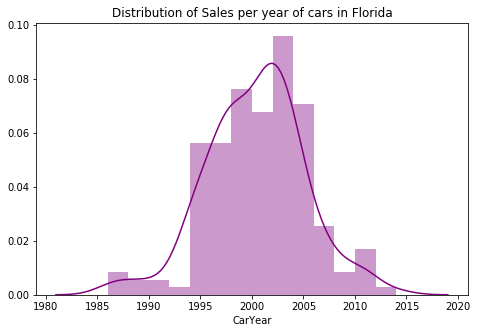

In [131]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[data["State"]== 3]['CarYear'],color='purple',ax=ax)
ax.set_title('Distribution of Sales per year of cars in Florida')
plt.show()

In [132]:
# People from Florida Prefer cars model between 1986 and 2014. For FL there is a tendency that 2003-2005 are the car models that these people prefer. 

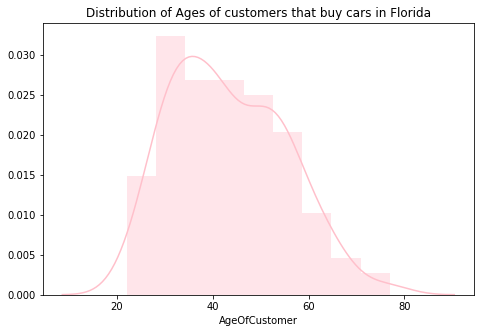

In [133]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[data["State"]== 3]['AgeOfCustomer'],color='pink',ax=ax)
ax.set_title('Distribution of Ages of customers that buy cars in Florida')

plt.show()

In [134]:
# In Florida people begin requesting loans after 20 years to buy a car and the largest number of people who take out a loan are between 30 and 50 years old.

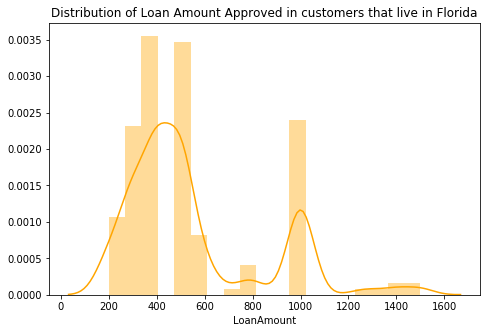

In [135]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[data["State"]== 3]['LoanAmount'],color='orange',ax=ax)
ax.set_title('Distribution of Loan Amount Approved in customers that live in Florida')

plt.show()

In [136]:
# The majority of credit approved for people living in FL is between $200 - $450 and $600. 

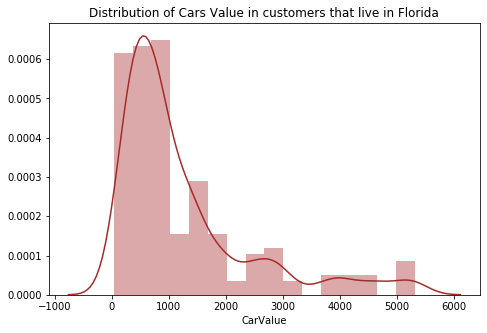

In [137]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[data["State"]== 3]['CarValue'],color='brown',ax=ax)
ax.set_title('Distribution of Cars Value in customers that live in Florida')

plt.show()

In [138]:
# People in FL prefers cars that have a value below of $1K, but there are some observations that shows values from $3.5K to $5.5K.

### Feature Selection

### Matriz Corrrelation

In [139]:
data_num = data[['CarYear', 'CarValue', 'AgeOfCustomer','flag_ACH', 'ccAuth', 'AddressStatus', 'PhoneStatus', 'flag_Employment','flag_CompanyPhone', 'PaidFrequency', 'AnnualSalary', 'flag_Spouse','LoanType', 'LoanAmount', 'LoanInterest', 'Maturity', 'Lien','flag_Cosigner', 'BadReference', 'Default']]

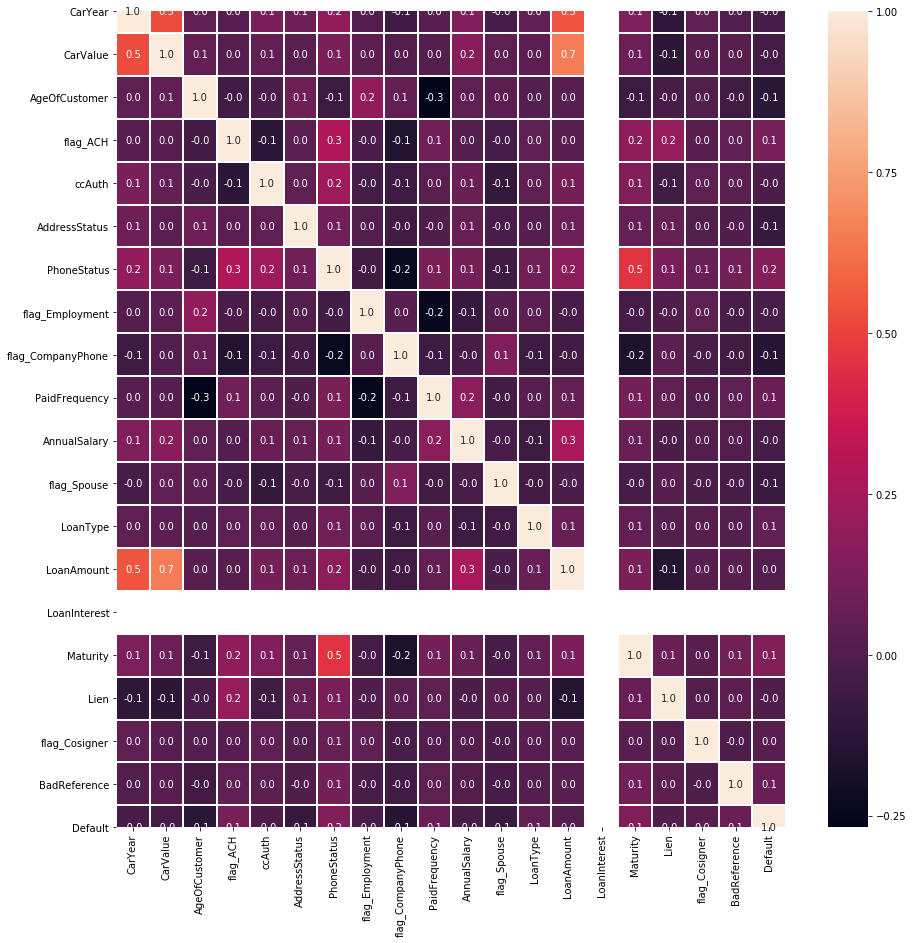

In [140]:
# Correlation between numeric variables and ordinal categorical variables
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_num.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

In [141]:
abs(data.corr()["Default"])

CarYear              0.018821
CarValue             0.034833
AgeOfCustomer        0.127140
flag_ACH             0.117213
ccAuth               0.014828
AddressStatus        0.079968
PhoneStatus          0.155847
flag_Employment      0.020093
flag_CompanyPhone    0.142912
PaidFrequency        0.076665
AnnualSalary         0.029397
flag_Spouse          0.070692
LoanType             0.053554
LoanAmount           0.002767
LoanInterest              NaN
Maturity             0.121811
Lien                 0.003780
flag_Cosigner        0.026622
BadReference         0.074756
Default              1.000000
Name: Default, dtype: float64

#### Analysis

The correlation matrix shows that:

* Car Value is positively correlated with Car Year, so the price of the vehicles will increase if the vehicle year is higher.
* Loan Amount is also positively correlated at 0.5 with Car year, which is to be expected because the newer the vehicle, the higher the loan amount.
* Maturity is positively correlated with Phone Status, that is, the more days of the billing cycle having a phone status will be more important.
* Annual Salary is positively correlated with Loan Amount, so the higher a person's salary, the more amount they will be given for credit.
* Flag_ACH is also positively correlated with Phone Status, maturity and Lien, since if customer has an active account this person would be given more billing cycle days. Same  with the lien on the vehicle.
* Flag_employment is negatively correlated with Paid Frequency, that is, if a person is not employed their frequency of salary payments will be higher and vice versa.
* Regarding default, there is a positive correlation with Phone Status, that is, if the person has an active phone, the probability that a person falls into Default increases.
* Default also has a negative correlation with AgeOfCustomer, so the younger the person is, the more likely they will fall into default, and vice versa. It also happens with Flag_ACH, which has a positive correlation, which indicates that if person has an active account there is a probability that it will default.
* Loan interest given the type of data that is only one, it is not even presented in the correlation matrix.


The others are non-linear correlations, that is, they do not depend on each other, however there are many positive and negative correlations but very low between variables, -0.0, 0.1 which indicates that although they index, they do not index as much as those that may have correlations stronger positives or negatives.

In [142]:
numero = data[['CarValue', 'AgeOfCustomer',  'PaidFrequency', 'AnnualSalary', 'LoanAmount', 'LoanInterest', 'Maturity']]

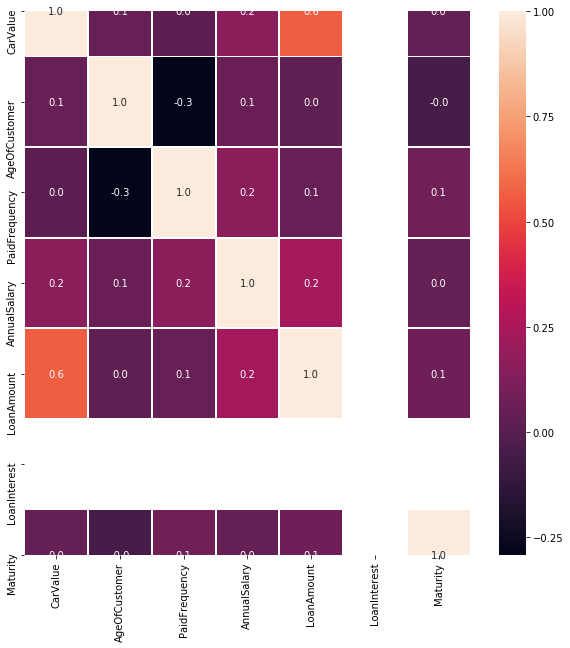

In [143]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(numero.corr(method='pearson'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

#### Anlysis with Pearson Method Numerical Variables

The correlation matrix with the person method shows that:

* Loan Amount is positively and strongly correlated with Car value, that is, the credit will be higher if the price of the vehicle increases. Car Value is also correlated with Annual Salary, since the more income a person receives, the more credit this person can receive.
* Annual Salary has a positive correlation with PaidFrequency, that is, if a person has a job, they will be paid more times per month. Annual Salary is also positively correlated with Car value, that is, if a person has a high salary they can have a higher value vehicle.
* There is a negative correlation with Age of Customer and Paid Frequency, that is, the older a person is, the fewer times a month they will be paid and vice versa.
* Maturity has a positive correlation with Loan Amount and Paid Frequency, which indicates that a person will be given more pay days if their credit is higher and their payment frequency is also higher.

Otherwise there are no linear correlations, for example between Age of Customer and Loan Amount, apparently the age of the customer is not important to give a certain amount, or paid frequency with car Value, since one does not affect the other.

### ANOVA

In [144]:
import scipy.stats as stats

In [145]:
print("Influence of providing an ACH Account in Default")
print(stats.f_oneway(data[data["flag_ACH"]==0]["Default"], 
               data[data["flag_ACH"]==1]["Default"]))
print()

print("Influence of providing a credit card authorization in Default")
print(stats.f_oneway(data[data["ccAuth"]==0]["Default"], 
               data[data["ccAuth"]==1]["Default"]))
print()


print("Influence of providing an address status in Default")
print(stats.f_oneway(data[data["AddressStatus"]==0]["Default"], 
               data[data["AddressStatus"]==1]["Default"]))
print()


print("Influence of providing a Phone Status in Default")
print(stats.f_oneway(data[data["PhoneStatus"]==0]["Default"], 
               data[data["PhoneStatus"]==1]["Default"]))
print()


print("Influence of customer has employment in Default")
print(stats.f_oneway(data[data["flag_Employment"]==0]["Default"], 
               data[data["flag_Employment"]==1]["Default"]))
print()


print("Influence of customer has a company phone in Default")
print(stats.f_oneway(data[data["flag_CompanyPhone"]==0]["Default"], 
               data[data["flag_CompanyPhone"]==1]["Default"]))
print()


print("Influence of customer has spouse in Default")
print(stats.f_oneway(data[data["flag_Spouse"]==0]["Default"], 
               data[data["flag_Spouse"]==1]["Default"]))
print()


print("Influence of having a lien on the vehicle in Default")
print(stats.f_oneway(data[data["Lien"]==0]["Default"], 
               data[data["Lien"]==1]["Default"]))
print()

print("Influence of customer has a co-signer in Default")
print(stats.f_oneway(data[data["flag_Cosigner"]==0]["Default"], 
               data[data["flag_Cosigner"]==1]["Default"]))
print()

print("Influence of when Bank is unable to reach the customer's reference in Default")
print(stats.f_oneway(data[data["BadReference"]==0]["Default"], 
               data[data["BadReference"]==1]["Default"]))
print()

Influence of providing an ACH Account in Default
F_onewayResult(statistic=82.77330986343125, pvalue=1.2329047889175573e-19)

Influence of providing a credit card authorization in Default
F_onewayResult(statistic=1.3067212780644932, pvalue=0.2530351985045137)

Influence of providing an address status in Default
F_onewayResult(statistic=38.242537391651034, pvalue=6.663416181365702e-10)

Influence of providing a Phone Status in Default
F_onewayResult(statistic=147.9142972804166, pvalue=1.2400694981906966e-33)

Influence of customer has employment in Default
F_onewayResult(statistic=2.3999805567895467, pvalue=0.12139001413703311)

Influence of customer has a company phone in Default
F_onewayResult(statistic=123.88925254338447, pvalue=1.7015870227643298e-28)

Influence of customer has spouse in Default
F_onewayResult(statistic=29.843276986295454, pvalue=4.874462885206958e-08)

Influence of having a lien on the vehicle in Default
F_onewayResult(statistic=0.0848901801861514, pvalue=0.77078678

### Analysis of P-value

In this case, it is interesting to check if the p-value obtained is greater than a contrast reference value to check if there are significant differences in the mean values of both groups and thus be able to analyze if the two groups of data for a binary variable obtain, in this case, significantly different ratings:

With a $ \ alpha = 0.05 $ and $ H_ {0} -> \ mu_ {1} = \ mu {2} = ... = \ mu_ {n} $
* If p-value <0.05 -> $ H_ {0} $ is rejected and therefore there are differences between the groups
* If p-value> = 0.05 -> $ H_ {0} $ is not rejected

Analyzing the previous results it can be seen that the 7 cases in which the differences between groups are seen (where there is a lower p-value) is in the case of **Flag_ACH**, **addressStatus**, **PhoneStatus**, **flag_CompanyPhone**, **flag_Spouse**, and **BadReference** in a way that will significantly influence whether or not a client falls into Default. In the same way, it seems that the **flag_Cosigner** also plays a part (although it is a value very close to $ \ alpha $). In the same way they also influence a little, although again it is a value close to 0.05, having or not having a co-signer seems to influence. 

### Tukey Test

### Analysis

Given that there are variables that have more than one factor, for this reason the Tukey test was used. 

The results can be consulted in the attached section, the main reason is because the tests are very large and reduce the formality of the work.

To run this test, the following variables were used:

1. State
2. Office
3. LoanAmount
4. Addvert
5. CarMake
6. Caryear
7. PaidFrequency
8. LoanType
9. AgeOfCustomer
10. Maturity
11. EmailDomain

But according to the tukey test the variables that reject the null hyphotesis are: 

* State
* Office
* Addvert
* PaidFrequency
* LoanType
* Maturity

The rest the accept the null hyphotesis. In the case of **Loan Amount** there is only point that rejected the null hypthosis, but is only one from a whole factor so is not longer being considered. 

### The tests used are reliable but it will be necessary to apply other methods such as Univariate feature selection and Recursive feature elimination with cross validation.

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Using Precision score because the 'default' is imbalanced.

In [147]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')
np.random.seed(8)
%matplotlib inline

In [148]:
def precion_score (model, x, y):
    ps = precision_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Precion Score is: ', ps)
    print('F1 score is: ', f_score)
    return

In [149]:
data['Default'].value_counts()

0    5183
1     761
Name: Default, dtype: int64

In [150]:
categorical_feature_columns = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_feature_columns

['Office',
 'CarMake',
 'Addvert',
 'EmailDomain',
 'CarModel',
 'City',
 'State',
 'CustomerID']

In [151]:
numerical_feature_columns = list(data._get_numeric_data().columns)
numerical_feature_columns

['CarYear',
 'CarValue',
 'AgeOfCustomer',
 'flag_ACH',
 'ccAuth',
 'AddressStatus',
 'PhoneStatus',
 'flag_Employment',
 'flag_CompanyPhone',
 'PaidFrequency',
 'AnnualSalary',
 'flag_Spouse',
 'LoanType',
 'LoanAmount',
 'LoanInterest',
 'Maturity',
 'Lien',
 'flag_Cosigner',
 'BadReference',
 'Default']

In [152]:
target = 'Default'

In [153]:
X = data.loc[:, data.columns != target]
Y = data.loc[:, data.columns == target]

In [154]:
X.shape

(5944, 27)

In [155]:
Y.shape

(5944, 1)

### Univariate feature selection

In [156]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [157]:
clf_lr = LogisticRegression(solver='lbfgs')      
lr_baseline_model = clf_lr.fit(x_train,y_train)

In [158]:
precion_score(lr_baseline_model, x_test, y_test)

Precion Score is:  0.0
F1 score is:  0.0


In [159]:
# Precison Score and F1 is 0 so model is not predicting anything. 

In [160]:
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [161]:
selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
1,CustomerID,242666.068
18,AnnualSalary,11264.854
8,CarValue,5008.763
3,State,911.081
2,City,476.098
6,CarModel,260.392
9,AgeOfCustomer,234.098
4,EmailDomain,158.250
0,Office,136.574
16,flag_CompanyPhone,70.896


In [162]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)

In [163]:
x_train.head(5)

,Office,CustomerID,City,State,EmailDomain,CarMake,CarModel,CarYear,CarValue,AgeOfCustomer,...,PaidFrequency,AnnualSalary,flag_Spouse,LoanType,LoanAmount,LoanInterest,Maturity,Lien,flag_Cosigner,BadReference
2371,2,2452,446,2,29,22,1020,1997,350.000,54,...,3.000,7000.000,0,12,250.000,25,30,1,0,0
646,7,593,391,15,100,25,865,2003,862.000,38,...,1.000,19999.000,1,1,600.000,25,30,1,0,0
3855,4,10685,263,2,100,2,52,2004,3700.000,31,...,3.000,37498.000,1,0,1850.000,25,30,0,0,0
5291,3,3891,432,2,100,9,371,1999,200.000,52,...,2.000,21948.000,0,1,300.000,25,30,1,0,0
3641,1,1856,114,2,100,5,153,2002,500.000,33,...,2.000,40089.000,0,1,500.000,25,30,1,0,0


In [164]:
x_train_chi[0:3]

array([[2452, 446, 2, 350.0, 7000.0],
       [593, 391, 15, 862.0, 19999.0],
       [10685, 263, 2, 3700.0, 37498.0]], dtype=object)

In [165]:
lr_chi_model = clf_lr.fit(x_train_chi,y_train)

In [166]:
precion_score(lr_chi_model, x_test_chi, y_test)

Precion Score is:  0.375
F1 score is:  0.026785714285714284


In [167]:
# It shows a briefly improvement, but F1 is still giving bad results. 

In [168]:
rfe = RFE(estimator=clf_lr, step=1)
rfe = rfe.fit(x_train, y_train)

In [169]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Office,1
24,Lien,1
20,LoanType,1
19,flag_Spouse,1
17,PaidFrequency,1
16,flag_CompanyPhone,1
14,PhoneStatus,1
12,ccAuth,1
11,flag_ACH,1
13,AddressStatus,1


In [170]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [171]:
x_train_rfe[0:3]

array([[2, 2, 54, 1, 0, 1, 0, 0, 3.0, 0, 12, 1, 0],
       [7, 15, 38, 1, 1, 1, 1, 0, 1.0, 1, 1, 1, 0],
       [4, 2, 31, 0, 1, 1, 0, 0, 3.0, 1, 0, 0, 0]], dtype=object)

In [172]:
lr_rfe_model = clf_lr.fit(x_train_rfe, y_train)

In [173]:
precion_score(lr_rfe_model, x_test_rfe, y_test)

Precion Score is:  0.5714285714285714
F1 score is:  0.06956521739130435


In [174]:
# Still happening, but the precion Score is relatively better than previos. Model is still making good predictions for 0 but not for 1, due to inbalanced in "Default"

### Recursive feature elimination with cross validation

In [175]:
rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['Office', 'State', 'AgeOfCustomer', 'Addvert', 'flag_ACH', 'ccAuth',
       'AddressStatus', 'PhoneStatus', 'flag_CompanyPhone', 'PaidFrequency',
       'flag_Spouse', 'LoanType', 'Maturity', 'Lien', 'BadReference'],
      dtype='object')


In [176]:
rfecv.grid_scores_

array([0.86899038, 0.86899038, 0.86899038, 0.86899038, 0.86899038,
       0.86875   , 0.86899038, 0.86899038, 0.86875   , 0.86899038,
       0.86899038, 0.86971154, 0.86947115, 0.87019231, 0.87043269,
       0.86971154, 0.86875   , 0.86826923, 0.86850962, 0.86875   ,
       0.86850962, 0.86875   , 0.86754808, 0.86754808, 0.86778846,
       0.86899038, 0.86899038])

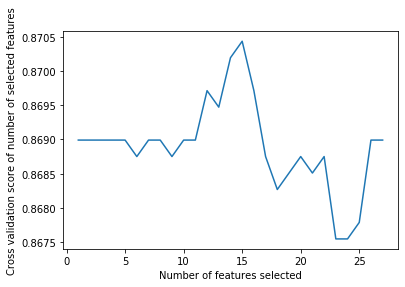

In [177]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [178]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [179]:
lr_rfecv_model = clf_lr.fit(x_train_rfecv, y_train)

In [180]:
precion_score(lr_rfecv_model, x_test_rfecv, y_test)

Precion Score is:  0.5714285714285714
F1 score is:  0.06956521739130435


In [181]:
# Model has the same problem than previous using univariate and returned 15 features that are the most important. 

### General OverView fearure selection

As expected, the possible model that may come out is going to be quite poor predicting the default [1] because it is a classic problem of imbalanced data, however based on the ANOVA, the Turkey test, the Univariate feature selection and the Recursive feature removal with cross-validation will work are the following features because most of them in ANOVA where detected and Turkey as well and with the last 2 methods they confirmed that they affected the restuls. 

* Office
* State
* Addvert 
* Flag_ACH
* AddressStatus
* PhoneStatus
* flag_CompanyPhone
* PaidFrequency
* flag_Spouse
* LoanType
* Maturity
* BadReference
* AgeOfCustomer
* CC_auth
* Lien

### Algorithm Selection: 

In accordance with: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

The recommended algorithms are SVM with linear kernel (sigmoid, rbf and poly kernels are also used) and KNN.

Also, due to the variable to be predicted is quite unbalanced, a logistic regression will be used and after the hyperparameter class_weight will to check if the results improve. On the other hand, a subsampling is also performed in the majority class with the help of an algorithm similar to KNN that selects which ones eliminate. Likewise, there will be an Oversampling of the minority class and finally an Assembly of Models with Balancing (which uses Bagging and the model will be a DecisionTree) all this in order to be able to evaluate with which of the algorithms return the better prediction for both classes of "Default".


In [182]:
# Standarizing and centering the table as there are values on different scales
dataset = data.iloc[:,0:27]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(dataset) 
dataset.loc[:,:] = scaled_values
dataset.head()

,Office,CustomerID,City,State,EmailDomain,CarMake,CarModel,CarYear,CarValue,AgeOfCustomer,...,PaidFrequency,AnnualSalary,flag_Spouse,LoanType,LoanAmount,LoanInterest,Maturity,Lien,flag_Cosigner,BadReference
0,1.362,-0.523,-1.431,0.829,1.336,1.081,0.657,1.880,-0.182,1.209,...,1.255,-0.110,0.686,0.876,1.025,0.000,1.685,-1.522,18.672,-0.096
1,1.362,-0.523,-1.431,0.829,1.336,1.081,0.657,1.880,-0.182,1.209,...,1.255,-0.110,0.686,0.876,1.025,0.000,1.685,-1.522,18.672,-0.096
2,0.302,-0.586,-1.556,2.110,0.020,-0.925,-1.277,1.036,0.371,-0.615,...,1.255,-0.675,0.686,1.456,1.025,0.000,1.685,-1.522,-0.054,-0.096
3,0.656,-0.425,-0.149,0.829,-1.162,-0.227,-0.967,-0.230,-1.032,-1.112,...,-1.351,-0.621,0.686,2.326,-1.252,0.000,-0.263,-1.522,-0.054,-0.096
4,0.656,-0.425,-0.557,0.829,-1.629,-0.227,0.602,1.880,-0.182,-0.200,...,-1.351,-0.110,0.686,-0.284,2.448,0.000,-0.263,-1.522,-0.054,-0.096


In [183]:
# Defining features
X = dataset[['Office', 'State', 'AgeOfCustomer', 'Addvert', 'flag_ACH', 'ccAuth',
        'AddressStatus', 'PhoneStatus', 'flag_CompanyPhone', 'PaidFrequency',
       'flag_Spouse', 'LoanType', 'Maturity', 'Lien', 'BadReference']]
X


,Office,State,AgeOfCustomer,Addvert,flag_ACH,ccAuth,AddressStatus,PhoneStatus,flag_CompanyPhone,PaidFrequency,flag_Spouse,LoanType,Maturity,Lien,BadReference
0,1.362,0.829,1.209,0.610,0.541,1.117,0.269,1.380,-0.556,1.255,0.686,0.876,1.685,-1.522,-0.096
1,1.362,0.829,1.209,0.610,0.541,1.117,0.269,1.380,-0.556,1.255,0.686,0.876,1.685,-1.522,-0.096
2,0.302,2.110,-0.615,0.610,0.541,1.117,0.269,1.380,-0.556,1.255,0.686,1.456,1.685,-1.522,-0.096
3,0.656,0.829,-1.112,0.610,0.541,-0.895,0.269,1.380,-0.556,-1.351,0.686,2.326,-0.263,-1.522,-0.096
4,0.656,0.829,-0.200,-0.911,0.541,1.117,0.269,1.380,-0.556,-1.351,0.686,-0.284,-0.263,-1.522,-0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,1.715,-0.666,1.872,-2.052,0.541,-0.895,0.269,-0.724,-0.556,-1.351,0.686,-0.284,-0.263,0.657,-0.096
5972,-1.464,-0.666,0.380,0.610,0.541,1.117,0.269,-0.724,-0.556,-0.048,0.686,-0.864,-0.263,-1.522,-0.096
5973,-1.111,-0.666,2.038,-2.052,0.541,-0.895,0.269,-0.724,-0.556,-1.351,0.686,1.746,-0.263,0.657,-0.096
5974,1.009,-0.666,1.872,-0.911,0.541,-0.895,0.269,-0.724,-0.556,-1.351,0.686,-0.284,-0.263,-1.522,-0.096


In [184]:
y = data['Default']
y

0       1
1       1
2       1
3       0
4       0
       ..
5971    0
5972    0
5973    0
5974    0
5975    0
Name: Default, Length: 5944, dtype: int64

In [185]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
 
from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [186]:
print(data.shape)
print(pd.value_counts(data['Default'], sort = True))

(5944, 28)
0    5183
1     761
Name: Default, dtype: int64


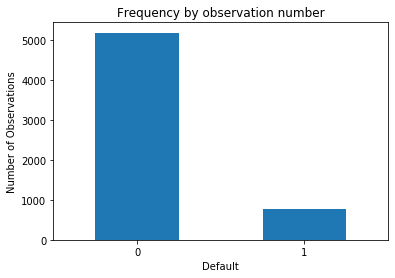

In [187]:
count_classes = pd.value_counts(data['Default'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), [0,1])
plt.title("Frequency by observation number")
plt.xlabel("Default")
plt.ylabel("Number of Observations");

In [247]:
# Features
y = data.iloc[:, 27:28]
X = data.iloc[:,0:27]
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
 
# Creatinga function that creates the model  that we will use each time
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
# Logistic Regression 
model = run_model(X_train, X_test, y_train, y_test)
 
# Function to show the results
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    print(conf_matrix) 
    print (classification_report(y_test, pred_y))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

r2 = r2_score(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

[[1552    8]
 [ 211   13]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1560
           1       0.62      0.06      0.11       224

    accuracy                           0.88      1784
   macro avg       0.75      0.53      0.52      1784
weighted avg       0.85      0.88      0.83      1784

r2: -0.11806318681318673  mae: 0.12275784753363228  mse: 0.12275784753363228  rmse: 0.3503681599883646


In [189]:
# Recall for 1 es very bad, it is necesarry to solve this. 

#### Penalty to compensate

In [246]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced") # change hyperparameter
    clf.fit(X_train, y_train)
    return clf
 
model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

r2 = r2_score(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

[[1018  530]
 [  70  166]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.77      1548
           1       0.24      0.70      0.36       236

    accuracy                           0.66      1784
   macro avg       0.59      0.68      0.56      1784
weighted avg       0.84      0.66      0.72      1784

r2: -1.9299697805807385  mae: 0.336322869955157  mse: 0.336322869955157  rmse: 0.5799335047702943


In [191]:
# There is an improvement in the number of cases of 1 that the model predicted 150 (TP) and 70 FP and FI is better than previuos. 

#### Subsampling in the majority class

In [240]:
us = NearMiss(n_neighbors=3, version=2)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

r2 = r2_score(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

[[942 622]
 [ 70 150]]
              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1564
           1       0.19      0.68      0.30       220

    accuracy                           0.61      1784
   macro avg       0.56      0.64      0.52      1784
weighted avg       0.84      0.61      0.68      1784

r2: -2.5879097884212983  mae: 0.38789237668161436  mse: 0.38789237668161436  rmse: 0.6228100646919688


In [193]:
# Result for 1 are worse than previous, now there are 150 TP and 70 FP the results of TN and FN are getting lower as well. 

#### Oversampling of the minority class

In [241]:
os =  RandomOverSampler(random_state=42)
X_train_res, y_train_res = os.fit_sample(X_train, y_train)

 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

r2 = r2_score(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

[[1042  522]
 [  69  151]]
              precision    recall  f1-score   support

           0       0.94      0.67      0.78      1564
           1       0.22      0.69      0.34       220

    accuracy                           0.67      1784
   macro avg       0.58      0.68      0.56      1784
weighted avg       0.85      0.67      0.72      1784

r2: -2.0642408742152996  mae: 0.3312780269058296  mse: 0.3312780269058296  rmse: 0.5755675693659517


In [195]:
# Results for 1 are pretty similar to "Penalty to compensate of the Logistic Regression". 

#### Balancing Model Assembly

In [242]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),sampling_strategy='auto',replacement=False,random_state=0)
 
#Train the classifier.
bbc.fit(X_train, y_train)
pred_y = bbc.predict(X_test)
mostrar_resultados(y_test, pred_y)

r2 = r2_score(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

[[1311  253]
 [ 103  117]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1564
           1       0.32      0.53      0.40       220

    accuracy                           0.80      1784
   macro avg       0.62      0.69      0.64      1784
weighted avg       0.85      0.80      0.82      1784

r2: -0.8458033015577777  mae: 0.19955156950672645  mse: 0.19955156950672645  rmse: 0.4467119536196971


In [244]:
# The model decrease the 1 prediction but increase F1 score for both predictors. 

#### Support Vector Machine - Linear Kernel

In [244]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', gamma = 'scale', max_iter=300000, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)


print (classification_report(y_test, pred_y))

r2 = r2_score(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)


[[810 738]
 [113 123]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1548
           1       0.43      0.04      0.07       236

    accuracy                           0.87      1784
   macro avg       0.65      0.52      0.50      1784
weighted avg       0.81      0.87      0.81      1784

r2: -0.16710462926466096  mae: 0.13396860986547085  mse: 0.13396860986547085  rmse: 0.3660172261867887


In [197]:
# With Lineal Kernel the results are not good but at least there is an improvement predicting the class of 1, the F1 score for both 

In [248]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', gamma = 'scale', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)


print (classification_report(y_test, pred_y))

r2 = r2_score(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)


[[1560    0]
 [ 224    0]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1560
           1       0.62      0.06      0.11       224

    accuracy                           0.88      1784
   macro avg       0.75      0.53      0.52      1784
weighted avg       0.85      0.88      0.83      1784

r2: -0.11806318681318673  mae: 0.12275784753363228  mse: 0.12275784753363228  rmse: 0.3503681599883646


In [ ]:
# Bad results is only predicting the TN. 

In [249]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly', gamma = 'scale', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)


print (classification_report(y_test, pred_y))

r2 = r2_score(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)


[[1560    0]
 [ 224    0]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1560
           1       0.62      0.06      0.11       224

    accuracy                           0.88      1784
   macro avg       0.75      0.53      0.52      1784
weighted avg       0.85      0.88      0.83      1784

r2: -0.11806318681318673  mae: 0.12275784753363228  mse: 0.12275784753363228  rmse: 0.3503681599883646


In [199]:
# Bad results is only predicting the TN. 

In [250]:
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid', gamma = 'scale', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)


print (classification_report(y_test, pred_y))

r2 = r2_score(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)


[[1377  183]
 [ 197   27]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1560
           1       0.62      0.06      0.11       224

    accuracy                           0.88      1784
   macro avg       0.75      0.53      0.52      1784
weighted avg       0.85      0.88      0.83      1784

r2: -0.11806318681318673  mae: 0.12275784753363228  mse: 0.12275784753363228  rmse: 0.3503681599883646


In [202]:
# With Sigmoid kernel there is an improvement as well, the F1 score is very bad in 1, but at least predicts some good. 

### Model Evaluation

In [202]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split

In [203]:
# Logistic Regression
instancia_kfold = KFold(n_splits=10)
porcentajes = cross_val_score(LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg"), X, y.iloc[:,0].values, cv=instancia_kfold)
print("Percentage of detection per group:\n{}".format(porcentajes))
res_logistic = porcentajes.mean()
print("Average Detection: {:.2f}".format(porcentajes.mean()))

Percentage of detection per group:
[0.80672269 0.79159664 0.76302521 0.78319328 0.95622896 0.94444444
 0.93771044 0.95454545 0.90909091 0.85858586]
Average Detection: 0.87


In [204]:
# Logistic Regression - Balanced
instancia_kfold = KFold(n_splits=10)
porcentajes = cross_val_score(LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced"), X, y.iloc[:,0].values, cv=instancia_kfold)
print("Percentage of detection per group:\n{}".format(porcentajes))
res_logistic_balanced = porcentajes.mean()
print("Average Detection: {:.2f}".format(porcentajes.mean()))

Percentage of detection per group:
[0.32268908 0.30252101 0.28739496 0.77647059 0.84175084 0.85521886
 0.81481481 0.80808081 0.82996633 0.81649832]
Average Detection: 0.67


In [205]:
# Balanced Bagging Classifier - Decision Tree
instancia_kfold = KFold(n_splits=10)
porcentajes = cross_val_score(BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),sampling_strategy='auto',replacement=False,random_state=0), X, y.iloc[:,0].values, cv=instancia_kfold)
print("Percentage of detection per group:\n{}".format(porcentajes))
res_decison_tree = porcentajes.mean()
print("Average Detection: {:.2f}".format(porcentajes.mean()))


Percentage of detection per group:
[0.68067227 0.60840336 0.50420168 0.78151261 0.89225589 0.87037037
 0.88047138 0.89393939 0.88720539 0.82323232]
Average Detection: 0.78


In [206]:
# SVM - Kernel linear
instancia_kfold = KFold(n_splits=10)
porcentajes = cross_val_score(SVC(kernel='linear', gamma = 'scale', max_iter=250000, random_state = 0), X, y.iloc[:,0].values, cv=instancia_kfold)
print("Percentage of detection per group:\n{}".format(porcentajes))
res_linear = porcentajes.mean()
print("Average Detection: {:.2f}".format(porcentajes.mean()))

Percentage of detection per group:
[0.54957983 0.52268908 0.34453782 0.49243697 0.51851852 0.47138047
 0.6010101  0.56060606 0.63636364 0.43434343]
Average Detection: 0.51


In [210]:
# SVM - Kernel rbf
instancia_kfold = KFold(n_splits=10)
porcentajes = cross_val_score(SVC(kernel='rbf', gamma = 'scale', random_state = 0), X, y.iloc[:,0].values, cv=instancia_kfold)
print("Percentage of detection per group:\n{}".format(porcentajes))
res_rbf = porcentajes.mean()
print("Average Detection: {:.2f}".format(porcentajes.mean()))

Percentage of detection per group:
[0.79663866 0.80504202 0.77647059 0.77647059 0.95959596 0.94612795
 0.93939394 0.95117845 0.91245791 0.85690236]
Average Detection: 0.87


In [207]:
# SVM - Kernel poly
instancia_kfold = KFold(n_splits=10)
porcentajes = cross_val_score(SVC(kernel='poly', gamma = 'scale', random_state = 0), X, y.iloc[:,0].values, cv=instancia_kfold)
print("Percentage of detection per group:\n{}".format(porcentajes))
res_poly = porcentajes.mean()
print("Average Detection: {:.2f}".format(porcentajes.mean()))

Percentage of detection per group:
[0.79663866 0.80504202 0.77647059 0.77647059 0.95959596 0.94612795
 0.93939394 0.95117845 0.91245791 0.85690236]
Average Detection: 0.87


In [208]:
# SVM - Kernel sigmoid
instancia_kfold = KFold(n_splits=10)
porcentajes = cross_val_score(SVC(kernel='sigmoid', gamma = 'scale', random_state = 0), X, y.iloc[:,0].values, cv=instancia_kfold)
print("Percentage of detection per group:\n{}".format(porcentajes))
res_sigmoid = porcentajes.mean()
print("Average Detection: {:.2f}".format(porcentajes.mean()))

Percentage of detection per group:
[0.79663866 0.80504202 0.77647059 0.77647059 0.95959596 0.94444444
 0.93602694 0.94612795 0.91245791 0.85690236]
Average Detection: 0.87


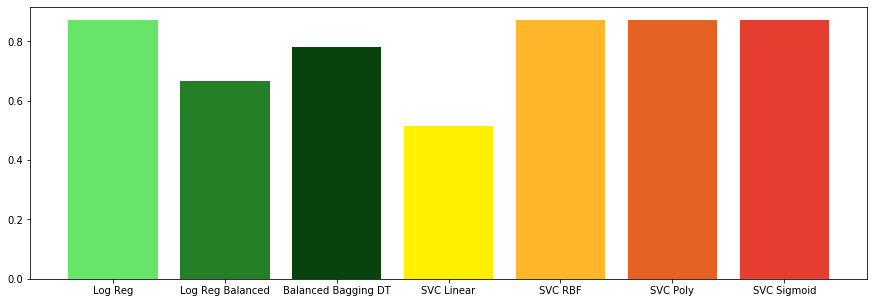

In [211]:
import numpy as np

plt.figure(figsize=(15,5))
alto = [res_logistic, res_logistic_balanced, res_decison_tree, res_linear,  res_rbf, res_poly, res_sigmoid]
barras = ('Log Reg','Log Reg Balanced','Balanced Bagging DT','SVC Linear','SVC RBF','SVC Poly','SVC Sigmoid')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto,color = ["#67E568","#257F27","#08420D","#FFF000","#FFB62B","#E56124","#E53E30"]
)
plt.xticks(y_pos, barras)
plt.show()

### ROC Curve

In [212]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [213]:
def plotROC(real, prediccion, color = "red", label = None):
    fp_r, tp_r, umbral = roc_curve(real, prediccion)
    plt.plot(fp_r, tp_r, lw = 1, color = color, label = label)
    plt.plot([0, 1], [0, 1], lw = 1, color = "black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positve Rate")
    plt.title("ROC Curve")

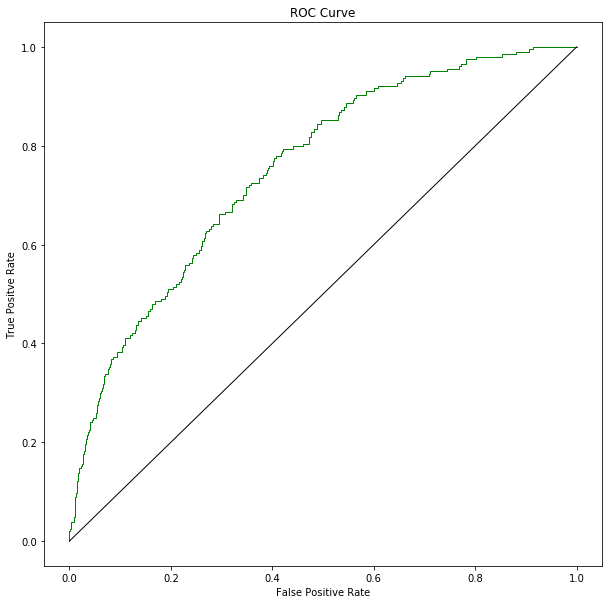

In [214]:
# ROC Curve Logistic Regression
instancia_logistic = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
instancia_logistic.fit(X_train,y_train.iloc[:,0].values)
instancia_logistic.predict_proba(X_test)
probabilidad = instancia_logistic.predict_proba(X_test)[:, 1]
probabilidad
plt.figure(figsize=(10,10))
plotROC(y_test, instancia_logistic.predict_proba(X_test)[:, 1], color = "green")

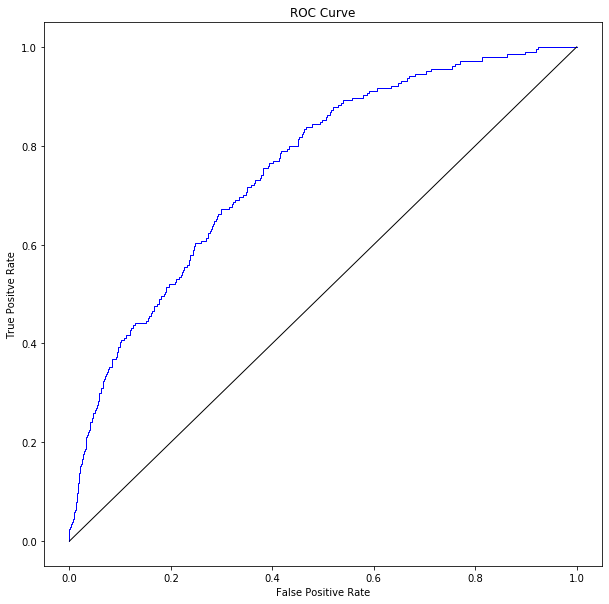

In [215]:
# ROC Curve Logistic Regression - Balanced
instancia_logistic_balanced = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
instancia_logistic_balanced.fit(X_train,y_train.iloc[:,0].values)
instancia_logistic_balanced.predict_proba(X_test)
probabilidad = instancia_logistic_balanced.predict_proba(X_test)[:, 1]
probabilidad
plt.figure(figsize=(10,10))
plotROC(y_test, instancia_logistic_balanced.predict_proba(X_test)[:, 1], color = "blue")

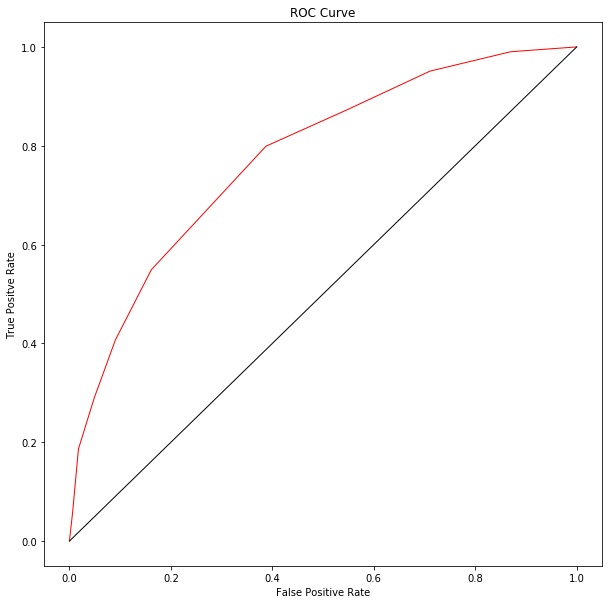

In [216]:
# ROC Curve Balanced Bagging Classsifier
decision_tree = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),sampling_strategy='auto',replacement=False,random_state=0)
decision_tree.fit(X_train,y_train.iloc[:,0].values)
decision_tree.predict_proba(X_test)
probabilidad = decision_tree.predict_proba(X_test)[:, 1]
probabilidad
plt.figure(figsize=(10,10))
plotROC(y_test, decision_tree.predict_proba(X_test)[:, 1], color = "red")

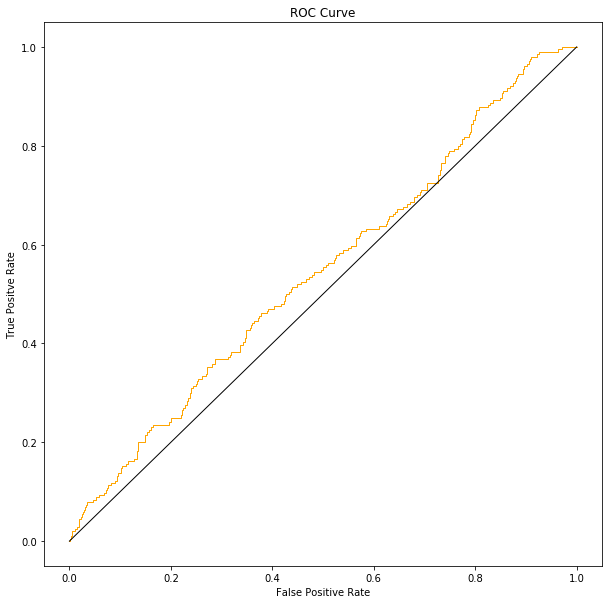

In [217]:
# ROC Curve SVM - Linear Kernel
linear = SVC(kernel='linear', gamma = 'scale', max_iter=250000, random_state = 0, probability=True)
linear.fit(X_train,y_train.iloc[:,0].values)
linear.predict_proba(X_test)
probabilidad = linear.predict_proba(X_test)[:, 1]
probabilidad
plt.figure(figsize=(10,10))
plotROC(y_test, linear.predict_proba(X_test)[:, 1], color = "orange")

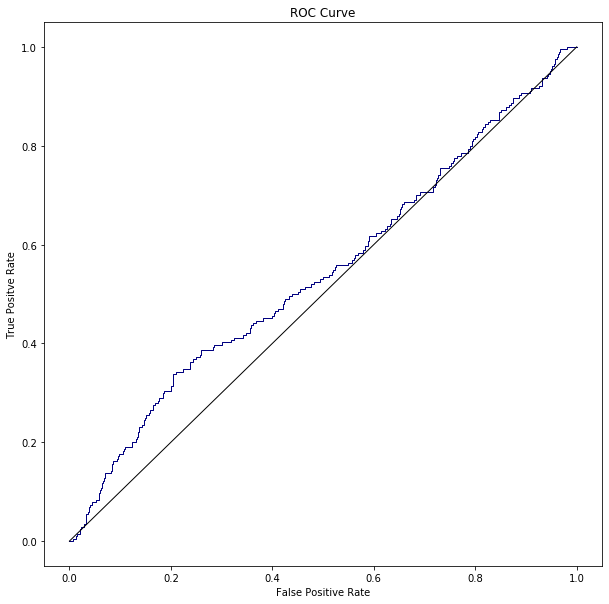

In [218]:
# ROC Curve SVM - RBF Kernel
rbf = SVC(kernel='rbf', gamma = 'scale', random_state = 0, probability=True)
rbf.fit(X_train,y_train.iloc[:,0].values)
rbf.predict_proba(X_test)
probabilidad = rbf.predict_proba(X_test)[:, 1]
probabilidad
plt.figure(figsize=(10,10))
plotROC(y_test, rbf.predict_proba(X_test)[:, 1], color = "navy")

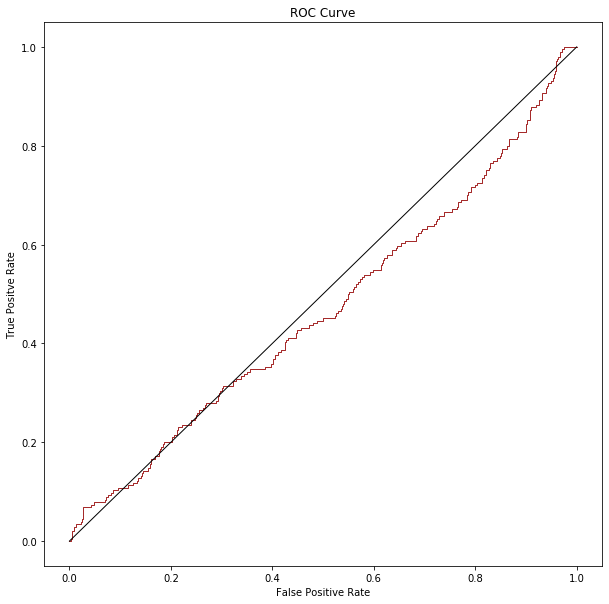

In [219]:
# ROC Curve SVM - poly Kernel
poly = SVC(kernel='poly', gamma = 'scale', random_state = 0, probability=True)
poly.fit(X_train,y_train.iloc[:,0].values)
poly.predict_proba(X_test)
probabilidad = poly.predict_proba(X_test)[:, 1]
probabilidad
plt.figure(figsize=(10,10))
plotROC(y_test, poly.predict_proba(X_test)[:, 1], color = "brown")

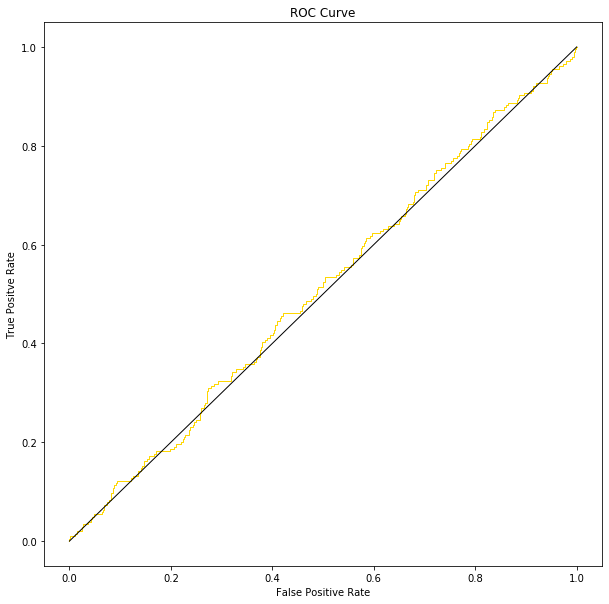

In [220]:
# ROC Curve SVM - Sigmoid Kernel
sigmoid = SVC(kernel='sigmoid', gamma = 'scale', random_state = 0, probability=True)
sigmoid.fit(X_train,y_train.iloc[:,0].values)
sigmoid.predict_proba(X_test)
probabilidad = sigmoid.predict_proba(X_test)[:, 1]
probabilidad
plt.figure(figsize=(10,10))
plotROC(y_test, sigmoid.predict_proba(X_test)[:, 1], color = "gold")

### ROC Curve for Models Comparisson

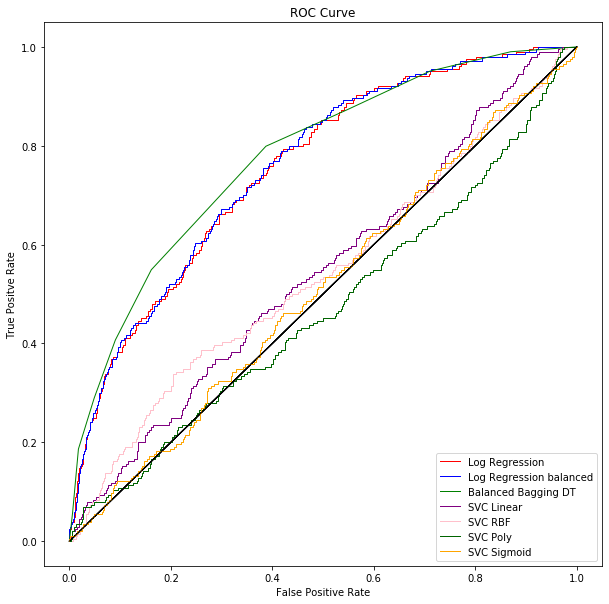

In [221]:
plt.figure(figsize=(10,10))
plotROC(y_test, instancia_logistic.predict_proba(X_test)[:, 1], label = 'Log Regression')
plotROC(y_test, instancia_logistic_balanced.predict_proba(X_test)[:, 1], color = "blue", label = 'Log Regression balanced')
plotROC(y_test, decision_tree.predict_proba(X_test)[:, 1], color = "green", label = 'Balanced Bagging DT')
plotROC(y_test, linear.predict_proba(X_test)[:, 1], color = "purple", label = 'SVC Linear')
plotROC(y_test, rbf.predict_proba(X_test)[:, 1], color = "pink", label = 'SVC RBF')
plotROC(y_test, poly.predict_proba(X_test)[:, 1], color = "darkgreen", label = 'SVC Poly')
plotROC(y_test, sigmoid.predict_proba(X_test)[:, 1], color = "orange", label = 'SVC Sigmoid')
plt.legend(loc = "lower right");

### Summary

With the models used, the predictions were not good, because they were only good at predicting class 0, but not class 1, so even if they show that they gave a high precision and accucary in many cases, they are falling into the error of believing that was for the whole model but it was only because there was a fairly good precision and a good recall, mostly for class 1. Another way to detect this is seeing the R2 that in every model was under 0, so any model has a good adjustment. Another problem was the problem of homoscedasticity. 

Now, if it is only interesting to have a model that predicts class 0 instead of 1 and does not matter the 1 class, the models that gave the best results were:

* Regression Logistics and Balanced Bagging Classifier - Decision Tree, because they have:

1. Logistic Regression: F1 = 0.93, precision = 88% (both for 0) accucarcy = 88%. With K fold, it shows a 87% of Average Detection and ROC Curve show good results as well. 
2. Balanced Bagging Classifier - Decision Tree: F1 = 0.88, precision = 93% (both for 0) accucarcy = 80%. With K fold, it shows a 78% of Average Detection and ROC Curve show good results as well. 

Although SVM rbf, poly and sigmoid show good results, the ROC Curve shows that there is a lot of noise from the false positive Rate while the two mentioned do not show it, so they are considered better. 


Now, if we are interested in class 1 and it does not matter that class 0 suffers decreases in its ratios, then you could consider using the Logistic Regression with the "unbalanced" hyperparameter or the Balancing Model Assembly, because they had good performance predicting the 1 class. It could also be evaluated doing a cutting method technique to see in which ranges the best predictions are achieved as long as it does not matter to penalize class 0.

In summary, to be able to achieve a very accurate prediction for this model, due to there is a bias in the dataset that we have, so there is an evident imbalance in the classes, which reduces precision, that is why I tried to use different models, some with low variance and the other ones with low bias and try to compensate the results in order to reach the optimal balance.

### Attachments

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

In [146]:
# Influence of State of living in Default
x = data["State"]
y = data["Default"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influence of State of living in Default")
print(Results)

Influence of State of living in Default
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.1667    0.9 -1.0279 0.6945  False
     0      2  -0.0962    0.9 -0.2948 0.1023  False
     0      3  -0.0819    0.9 -0.2987 0.1348  False
     0      4  -0.1667    0.9 -1.3685 1.0351  False
     0      5  -0.1667    0.9 -1.0279 0.6945  False
     0      6  -0.1667    0.9 -1.3685 1.0351  False
     0      7  -0.1667    0.9 -1.3685 1.0351  False
     0      8   0.8333 0.6394 -0.3685 2.0351  False
     0      9   0.0489    0.9 -0.1514 0.2492  False
     0     10  -0.1667    0.9 -1.3685 1.0351  False
     0     11  -0.1667    0.9  -0.879 0.5457  False
     0     12  -0.1667    0.9 -1.3685 1.0351  False
     0     13  -0.1667    0.9  -0.879 0.5457  False
     0     14  -0.1667    0.9 -1.0279 0.6945  False
     0     15   0.1261  0.815 -0.0767  0.329  False
     0     16  -0.1667  

In [147]:
# Influence of Office in Default
x = data["Office"]
y = data["Default"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influence of Office in Default")
print(Results)

Influence of Office in Default
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0252    0.9 -0.1024   0.052  False
     0      2  -0.0209    0.9 -0.0942  0.0524  False
     0      3  -0.0311    0.9 -0.1022    0.04  False
     0      4  -0.0396 0.6754  -0.106  0.0267  False
     0      5   -0.031    0.9 -0.1022  0.0401  False
     0      6   0.2172  0.001  0.1424   0.292   True
     0      7   0.1185  0.001  0.0526  0.1843   True
     0      8   0.0027    0.9 -0.0715  0.0768  False
     0      9   0.1469  0.001   0.077  0.2167   True
     0     10   0.0079    0.9 -0.0752  0.0911  False
     1      2   0.0043    0.9 -0.0667  0.0754  False
     1      3  -0.0059    0.9 -0.0747  0.0629  False
     1      4  -0.0144    0.9 -0.0782  0.0494  False
     1      5  -0.0058    0.9 -0.0746   0.063  False
     1      6   0.2424  0.001  0.1698   0.315   True
     1      7  

In [148]:
# Influence of Office in Default
x = data["LoanAmount"]
y = data["Default"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influence of LoanAmount in Default")
print(Results)

Influence of LoanAmount in Default
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 52.21   74.5      0.0    0.9 -1.8577 1.8577  False
 52.21  200.0   0.1282    0.9 -1.1869 1.4433  False
 52.21  250.0   0.1127    0.9 -1.2101 1.4355  False
 52.21  300.0   0.0831    0.9  -1.232 1.3983  False
 52.21  325.0      0.5    0.9 -1.1088 2.1088  False
 52.21  350.0   0.0893    0.9  -1.236 1.4146  False
 52.21  375.0      0.0    0.9 -1.8577 1.8577  False
 52.21  400.0   0.1236    0.9 -1.1907 1.4378  False
 52.21  450.0   0.2368    0.9 -1.0939 1.5676  False
 52.21  500.0   0.1506    0.9 -1.1635 1.4647  False
 52.21  550.0   0.1233    0.9 -1.1993 1.4459  False
 52.21  575.0      0.0    0.9 -1.8577 1.8577  False
 52.21  600.0   0.1191    0.9 -1.1965 1.4348  False
 52.21  650.0   0.1228    0.9 -1.2023 1.4479  False
 52.21 699.17      1.0    0.9 -0.8577 2.8577  False
 52.21  700.0   0.1015    0.9

In [149]:
# Influence of Addvert in Default
x = data["Addvert"]
y = data["Default"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influence of Addvert in Default")
print(Results)

Influence of Addvert in Default
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.8333  0.001 -1.3546  -0.312   True
     0      2  -0.6667 0.0015  -1.188 -0.1454   True
     0      3  -0.7652  0.001 -1.2464 -0.2839   True
     0      4  -0.6857  0.001 -1.1397 -0.2318   True
     0      5  -0.8333  0.521 -2.0278  0.3611  False
     0      6  -0.8333 0.0242 -1.6153 -0.0514   True
     0      7  -0.7833  0.001 -1.2357 -0.3308   True
     0      8  -0.5492 0.0061 -1.0158 -0.0827   True
     0      9  -0.3333    0.9 -1.2362  0.5696  False
     0     10  -0.1667    0.9 -0.9486  0.6153  False
     0     11  -0.6768  0.001 -1.1287 -0.2249   True
     0     12  -0.7362  0.001 -1.1899 -0.2826   True
     0     13     -0.5 0.0553 -1.0047  0.0047  False
     1      2   0.1667    0.9 -0.2019  0.5353  False
     1      3   0.0682    0.9 -0.2412  0.3776  False
     1      4 

In [150]:
# Influence of Car Make in Default
x = data["CarMake"]
y = data["Default"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influence of Car Make in Default")
print(Results)

# Justificar car model

Influence of Car Make in Default
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0879    0.9 -0.1994 0.3751  False
     0      2   0.1264    0.9 -0.1024 0.3553  False
     0      3    0.092    0.9 -0.0988 0.2829  False
     0      4    0.089    0.9 -0.1112 0.2892  False
     0      5   0.0549    0.9 -0.1117 0.2215  False
     0      6   0.0668    0.9 -0.1199 0.2536  False
     0      7   0.1042    0.9 -0.0685 0.2769  False
     0      8  -0.0455    0.9 -1.3598 1.2688  False
     0      9   0.0764    0.9 -0.0891 0.2418  False
     0     10  -0.0455    0.9 -1.3598 1.2688  False
     0     11  -0.0455    0.9 -0.6505 0.5596  False
     0     12   0.0264    0.9 -0.1633 0.2161  False
     0     13   0.1082    0.9 -0.0648 0.2812  False
     0     14   0.1531 0.4783 -0.0414 0.3477  False
     0     15   0.0315    0.9  -0.232 0.2949  False
     0     16   0.0315    0.9 -

In [151]:
# Influence of Car Make in Default
x = data["CarYear"]
y = data["Default"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influence of Car Year in Default")
print(Results)

Influence of Car Year in Default
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  1964   1967      0.0    0.9 -1.3102 1.3102  False
  1964   1970      0.0    0.9 -1.6047 1.6047  False
  1964   1974      0.0    0.9 -1.6047 1.6047  False
  1964   1975      0.0    0.9 -1.6047 1.6047  False
  1964   1976      0.0    0.9 -1.6047 1.6047  False
  1964   1977      0.0    0.9 -1.6047 1.6047  False
  1964   1978      0.0    0.9 -1.6047 1.6047  False
  1964   1983      0.0    0.9 -1.6047 1.6047  False
  1964   1984      0.0    0.9 -1.0962 1.0962  False
  1964   1985      0.4    0.9 -0.6962 1.4962  False
  1964   1986      0.3    0.9 -0.7149 1.3149  False
  1964   1987      0.0    0.9 -0.9827 0.9827  False
  1964   1988      0.0    0.9 -1.0505 1.0505  False
  1964   1989   0.1333    0.9  -0.853 1.1196  False
  1964   1990   0.1111    0.9 -0.8655 1.0877  False
  1964   1991   0.1538    0.9 -

In [152]:
# Influence of Car Make in Default
x = data["PaidFrequency"]
y = data["Default"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influence of PaidFrequency in Default")
print(Results)

Influence of PaidFrequency in Default
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   -0.013 0.4417 -0.0379 0.0119  False
   1.0    3.0   0.0644  0.001  0.0381 0.0908   True
   2.0    3.0   0.0774  0.001  0.0534 0.1014   True
---------------------------------------------------


In [153]:
# Influence of Car Make in Default
x = data["LoanType"]
y = data["Default"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influence of PaidFrequency in Default")
print(Results)

Influence of PaidFrequency in Default
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0585  0.001  0.0204  0.0965   True
     0      2   0.0712 0.0028  0.0138  0.1287   True
     0      3  -0.0728 0.0318 -0.1426  -0.003   True
     0      4  -0.0072    0.9 -0.0872  0.0728  False
     0      5  -0.0863    0.9 -0.3381  0.1656  False
     0      6  -0.0102    0.9 -0.1276  0.1073  False
     0      7   0.1221 0.0016  0.0265  0.2176   True
     0      8   0.1547  0.001  0.1015  0.2079   True
     0      9  -0.0404 0.5578 -0.1004  0.0196  False
     0     10   0.0209    0.9 -0.1873  0.2291  False
     0     11   0.1579 0.0011  0.0367  0.2792   True
     0     12   0.1042 0.0874 -0.0062  0.2146  False
     1      2   0.0127    0.9 -0.0421  0.0676  False
     1      3  -0.1313  0.001 -0.1989 -0.0636   True
     1      4  -0.0657 0.2097 -0.1438  0.0125  False
     1  

In [154]:
# Influence of Car Make in Default
x = data["AgeOfCustomer"]
y = data["Default"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influence of AgeOfCustomer in Default")
print(Results)

Influence of AgeOfCustomer in Default
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    18     19   0.1071    0.9 -0.5087  0.723  False
    18     20    0.011    0.9 -0.6261 0.6481  False
    18     21    0.133    0.9 -0.4393 0.7053  False
    18     22    0.014    0.9 -0.5338 0.5618  False
    18     23   0.0649    0.9 -0.4716 0.6014  False
    18     24   0.0571    0.9 -0.4761 0.5904  False
    18     25   0.0571    0.9 -0.4734 0.5876  False
    18     26   0.0251    0.9 -0.5021 0.5523  False
    18     27   0.0525    0.9 -0.4751   0.58  False
    18     28    0.011    0.9 -0.5151 0.5371  False
    18     29   0.0401    0.9 -0.4844 0.5646  False
    18     30   0.0499    0.9 -0.4745 0.5743  False
    18     31   0.0731    0.9 -0.4507 0.5968  False
    18     32   0.0218    0.9 -0.5023  0.546  False
    18     33  -0.0073    0.9  -0.531 0.5164  False
    18     34  -0.0196    

In [155]:
# Influence of Car Make in Default
x = data["Maturity"]
y = data["Default"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influence of Maturity in Default")
print(Results)

Influence of Maturity in Default
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    28     29  -0.0403  0.869 -0.1798 0.0993  False
    28     30  -0.0138    0.9 -0.0899 0.0622  False
    28     31   0.1177  0.001  0.0385  0.197   True
    29     30   0.0265    0.9 -0.0919 0.1448  False
    29     31    0.158 0.0042  0.0376 0.2784   True
    30     31   0.1315  0.001  0.1032 0.1599   True
---------------------------------------------------


In [156]:
# Influence of Car Make in Default
x = data["EmailDomain"]
y = data["Default"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influence of Email Domain in Default")
print(Results)

Influence of Email Domain in Default
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1      0.0    0.9 -2.1545 2.1545  False
     0      2      1.0    0.9 -0.8659 2.8659  False
     0      3      0.0    0.9 -2.1545 2.1545  False
     0      4      0.0    0.9 -2.1545 2.1545  False
     0      5      0.0    0.9 -1.7592 1.7592  False
     0      6      0.0    0.9 -1.8659 1.8659  False
     0      7      0.0    0.9 -1.7033 1.7033  False
     0      8      0.0    0.9 -1.7592 1.7592  False
     0      9      0.0    0.9 -1.6455 1.6455  False
     0     10      1.0    0.9 -1.1545 3.1545  False
     0     11      0.0    0.9 -2.1545 2.1545  False
     0     12      0.0    0.9 -2.1545 2.1545  False
     0     13      0.0    0.9 -2.1545 2.1545  False
     0     14      0.0    0.9 -2.1545 2.1545  False
     0     15      0.3    0.9 -1.2424 1.8424  False
     0     16      0.0    0